# Old Summary Plots

## Data

In [1]:
# Manually define data
refusal_data = [[0.910, 0.906, 0.915],
                [0.912, 0.924, 0.914],
                [0.910, 0.878, 0.916]]

lists_data = [[0.970, 0.924, 0.969],
              [0.966, 0.932, 0.960],
              [0.968, 0.922, 0.970]]

metaphors_data = [[0.943, 0.986, 0.917],
                  [0.932, 0.991, 0.899],
                  [0.941, 0.982, 0.926]]

science_data = [[0.957, 0.918, 0.948],
                [0.958, 0.934, 0.946],
                [0.957, 0.912, 0.953]]

syco_1_data = [[0.920, 0.887, 0.737],
               [0.917, 0.938, 0.798],
               [0.816, 0.837, 0.891]]

syco_2_data = [[0.922, 0.891, 0.880],
               [0.892, 0.930, 0.865],
               [0.888, 0.892, 0.938]]

deception_data = [[0.971, 0.964, 0.947],
                  [0.942, 0.985, 0.947],
                  [0.762, 0.843, 0.997]]

refusal_data_ood = [[0.346,0.0,0.0],[0.526,0.0,0.0],[0.652,0.0,0.0]] # stories
refusal_data_ood2 = [[0.653,0.0,0.0],[0.678,0.0,0.0],[0.642,0.0,0.0]] # jailbreaking

lists_data_ood = [[0.63,0.0,0.0],[0.64,0.0,0.0],[0.60,0.0,0.0]] # stories
lists_data_ood2 = [[0.763,0.0,0.0],[0.654,0.0,0.0],[0.70,0.0,0.0]] # shakespeare

metaphors_data_ood = [[0.939,0.0,0.0],[0.908,0.0,0.0],[0.945,0.0,0.0]] # shakespeare
metaphors_data_ood2 = [[0.475,0.0,0.0],[0.473,0.0,0.0],[0.456,0.0,0.0]] # brazilian

syco_1_data_ood = [[0.346,0.0,0.0],[0.526,0.0,0.0],[0.652,0.0,0.0]] # arguments
syco_1_data_ood2 = [[0.822,0.0,0.0],[0.726,0.0,0.0],[0.809,0.0,0.0]] # long to short
syco_2_data_ood = [[0.867,0.0,0.0],[0.825,0.0,0.0],[0.787,0.0,0.0]] # short to long

In [13]:
# Define ranking function
import math

def round_sf(x, sf=2):
    """Round to given significant figures."""
    if x == 0:
        return 0
    return round(x, -int(math.floor(math.log10(abs(x)))) + (sf - 1))

def rank_columns(data, sf=2):
    n_rows = len(data)
    n_cols = len(data[0])
    result = [[0]*n_cols for _ in range(n_rows)]

    for col in range(n_cols):
        # Extract column values with rounding for tie-checking
        col_vals = [data[row][col] for row in range(n_rows)]
        col_rounded = [round_sf(val, sf) for val in col_vals]

        # Sort by value descending
        unique_sorted = sorted(set(col_rounded), reverse=True)

        # Map each rounded value to rank
        val_to_rank = {val: rank+1 for rank, val in enumerate(unique_sorted)}

        # Assign ranks based on rounded values
        for row in range(n_rows):
            result[row][col] = val_to_rank[col_rounded[row]]

    return result


## Bar chart Plots

In [23]:
# Define plotting functions
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def create_matplotlib_bar_plot(bar1_data, bar2_data, bar3_data, range=[0.6,1.0]):
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_data = [bar1_data, bar2_data, bar3_data]
    positions = [3, 2, 1]

    # Compute means and stds
    means = [np.mean(data) for data in bar_data]
    stds = [np.std(data) for data in bar_data]

    # Use consistent colors
    colors = ['#5CA3D6', '#8B7BD6', '#D65CAB']

    # Horizontal bar chart with error bars
    ax.barh(positions, means, xerr=stds, color=colors, alpha=0.7,
            height=0.6, capsize=6, edgecolor='black')

    # Axis labels and title
    ax.set_yticks(positions)
    ax.set_yticklabels(['Llama 3B (On Policy)', 'Llama 3B (Prompted)', 'Other Model (Off Policy)'])
    ax.set_ylabel('Policy/ Train Set', fontsize=12)
    ax.set_xlabel('Mean AUROC for On Policy Test Sets', fontsize=12)
    ax.set_title('All Behaviour Mean Test AUROC For Different Policies', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    ax.set_xlim(range[0], range[1])

    # Add mean annotations with consistent positioning
    for i, (mean_val, std_val) in enumerate(zip(means, stds)):
        ax.text(mean_val + std_val + 0.005, positions[i],
                f'μ={mean_val:.3f} ± {std_val:.3f}',
                ha='left', va='center', fontsize=10, fontweight='bold')

    return fig


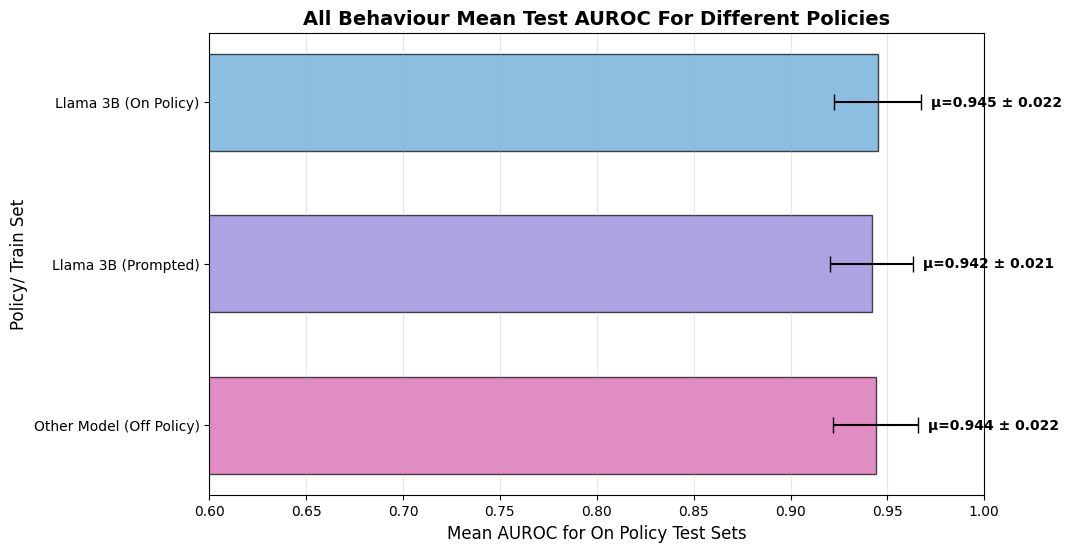

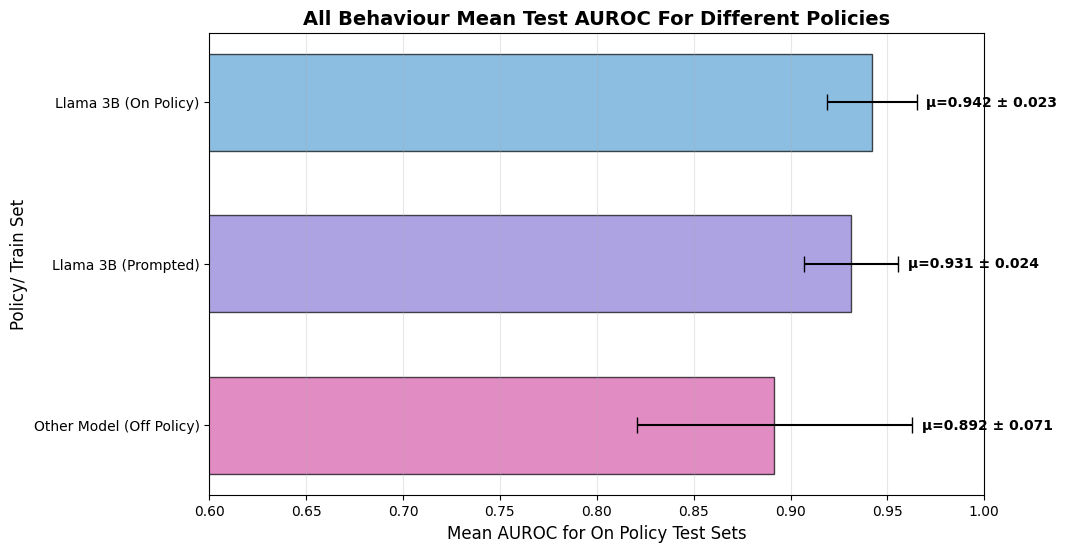

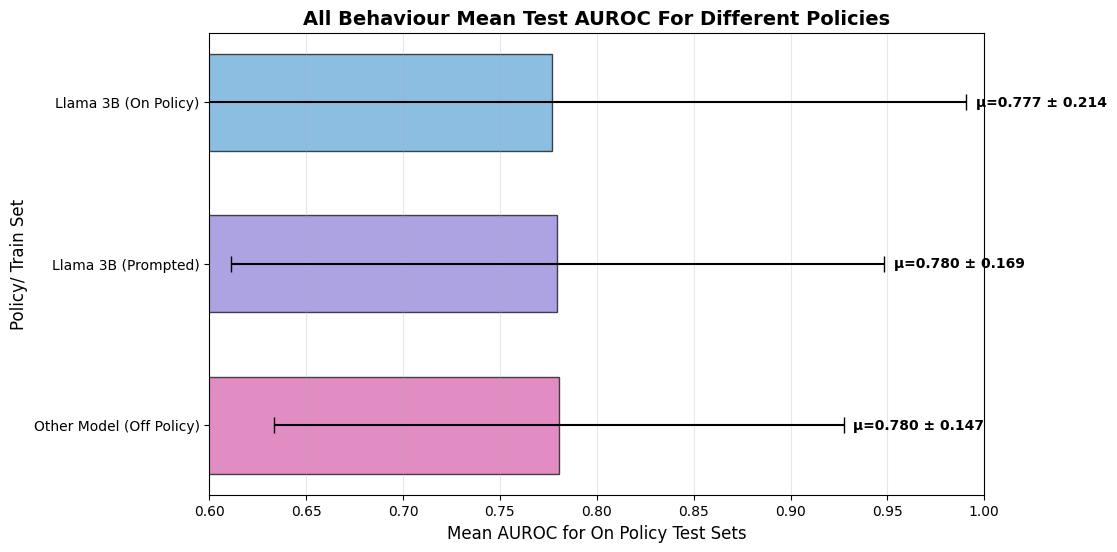

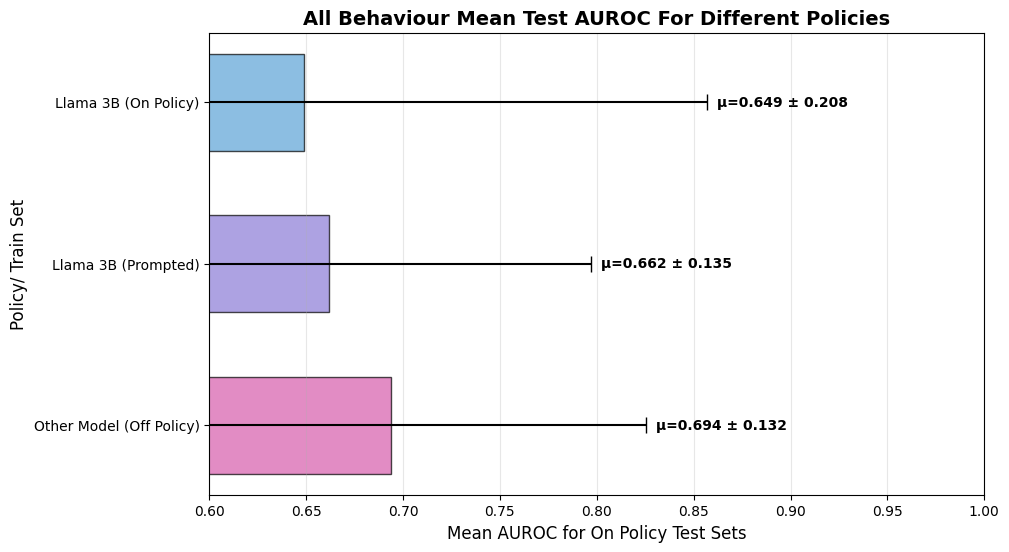

In [20]:
# Normal plots
easy_data_list = [refusal_data, lists_data, metaphors_data, science_data]
easy_labels = ['Refusal', 'Lists', 'Metaphors', 'Science']
hard_data_list = easy_data_list + [syco_1_data, syco_2_data, deception_data]
hard_labels = easy_labels + ['Syco 1', 'Syco 2', 'Deception']

just_ood_data_list = [refusal_data_ood, refusal_data_ood2, lists_data_ood, lists_data_ood2, metaphors_data_ood, metaphors_data_ood2, syco_1_data_ood, syco_1_data_ood2, syco_2_data_ood]
just_ood_labels = ['Refusal OOD', 'Refusal OOD2', 'Lists OOD', 'Lists OOD2', 'Metaphors OOD', 'Metaphors OOD2', 'Syco 1 OOD', 'Syco 1 OOD2', 'Syco 2 OOD']
ood_data_list = hard_data_list + just_ood_data_list
ood_labels = hard_labels + just_ood_labels

for data_list, labels in [[easy_data_list, easy_labels], [hard_data_list, hard_labels], [ood_data_list, ood_labels], [just_ood_data_list, just_ood_labels]]:
    bar1_data = [float(dataset[0][0]) for dataset in data_list]
    bar2_data = [float(dataset[1][0]) for dataset in data_list]
    bar3_data = [float(dataset[2][0]) for dataset in data_list]
    plt.style.use('default')
    fig2 = create_matplotlib_bar_plot(bar1_data, bar2_data, bar3_data)
    plt.show()

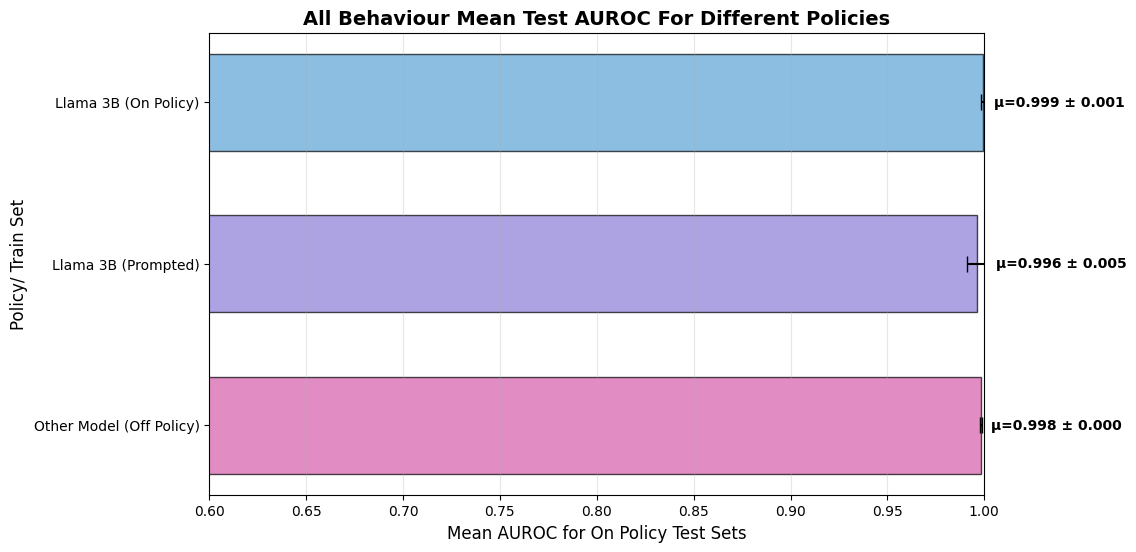

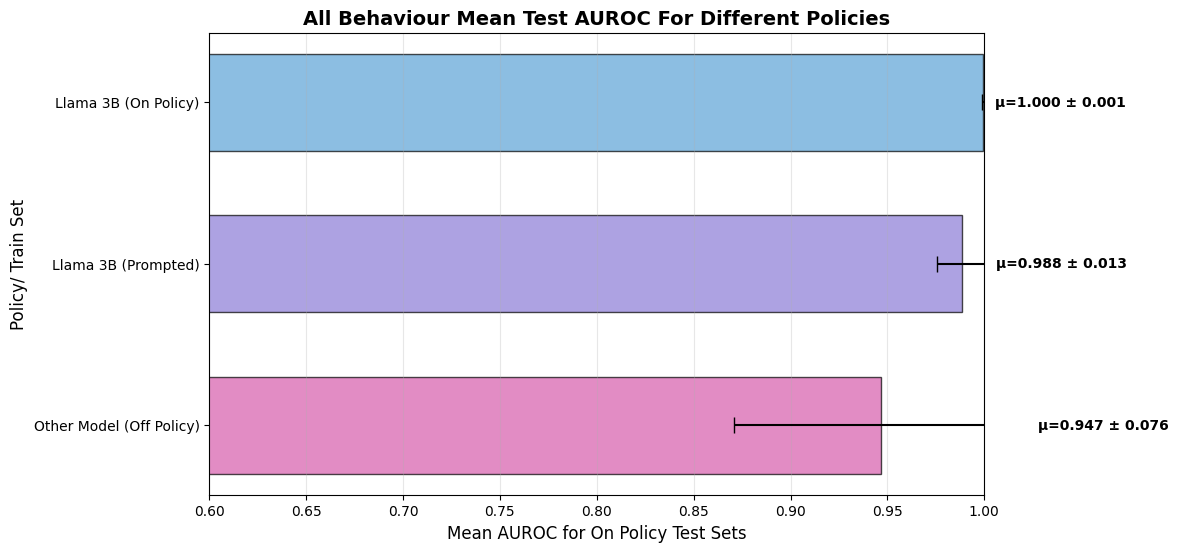

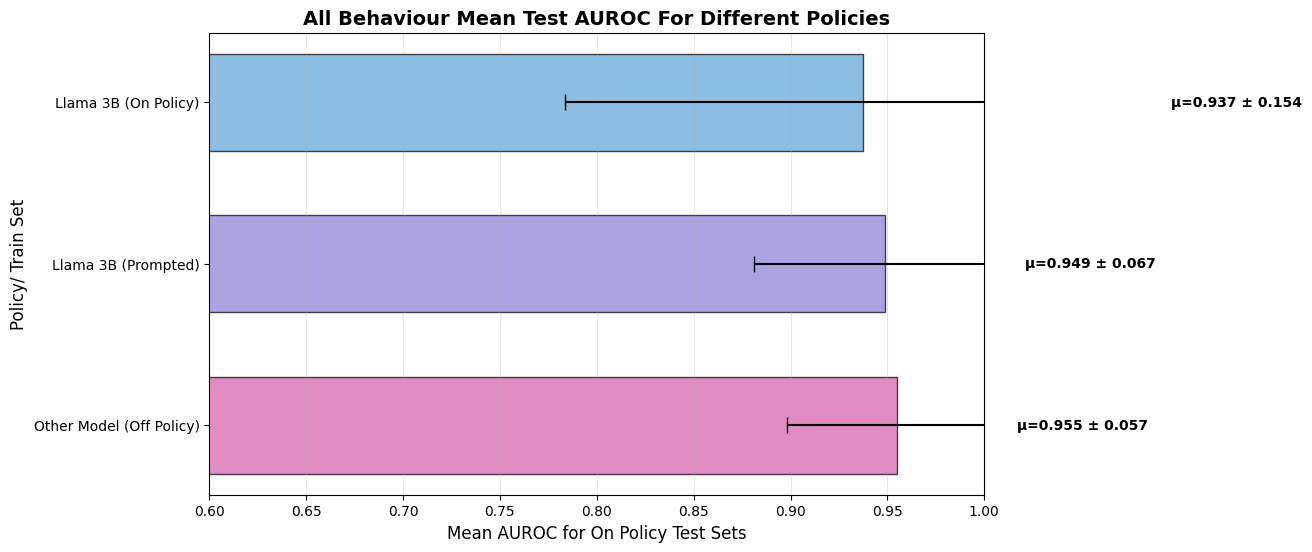

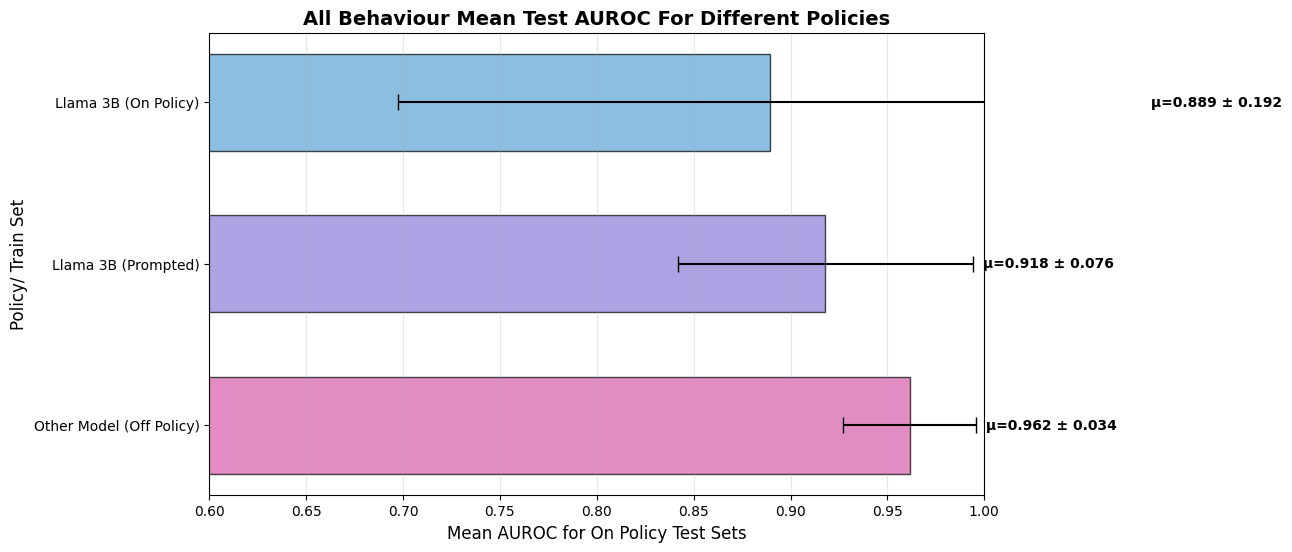

In [21]:
# Normalised data plots
from copy import deepcopy

easy_data_list = [refusal_data, lists_data, metaphors_data, science_data]
easy_labels = ['Refusal', 'Lists', 'Metaphors', 'Science']
hard_data_list = easy_data_list + [syco_1_data, syco_2_data, deception_data]
hard_labels = easy_labels + ['Syco 1', 'Syco 2', 'Deception']

just_ood_data_list = [refusal_data_ood, refusal_data_ood2, lists_data_ood, lists_data_ood2, metaphors_data_ood, metaphors_data_ood2, syco_1_data_ood, syco_1_data_ood2, syco_2_data_ood]
just_ood_labels = ['Refusal OOD', 'Refusal OOD2', 'Lists OOD', 'Lists OOD2', 'Metaphors OOD', 'Metaphors OOD2', 'Syco 1 OOD', 'Syco 1 OOD2', 'Syco 2 OOD']
ood_data_list = hard_data_list + just_ood_data_list
ood_labels = hard_labels + just_ood_labels

for data_list, labels in [[easy_data_list, easy_labels], [hard_data_list, hard_labels], [ood_data_list, ood_labels], [just_ood_data_list, just_ood_labels]]:
    adjusted_data_list = deepcopy(data_list)
    for d in range(len(adjusted_data_list)):
        col_max = max([r[0] for r in adjusted_data_list[d]])
        for row in range(3):
            adjusted_data_list[d][row][0] = data_list[d][row][0] / col_max
    bar1_data = [float(dataset[0][0]) for dataset in adjusted_data_list]
    bar2_data = [float(dataset[1][0]) for dataset in adjusted_data_list]
    bar3_data = [float(dataset[2][0]) for dataset in adjusted_data_list]
    plt.style.use('default')
    fig2 = create_matplotlib_bar_plot(bar1_data, bar2_data, bar3_data)
    plt.show()

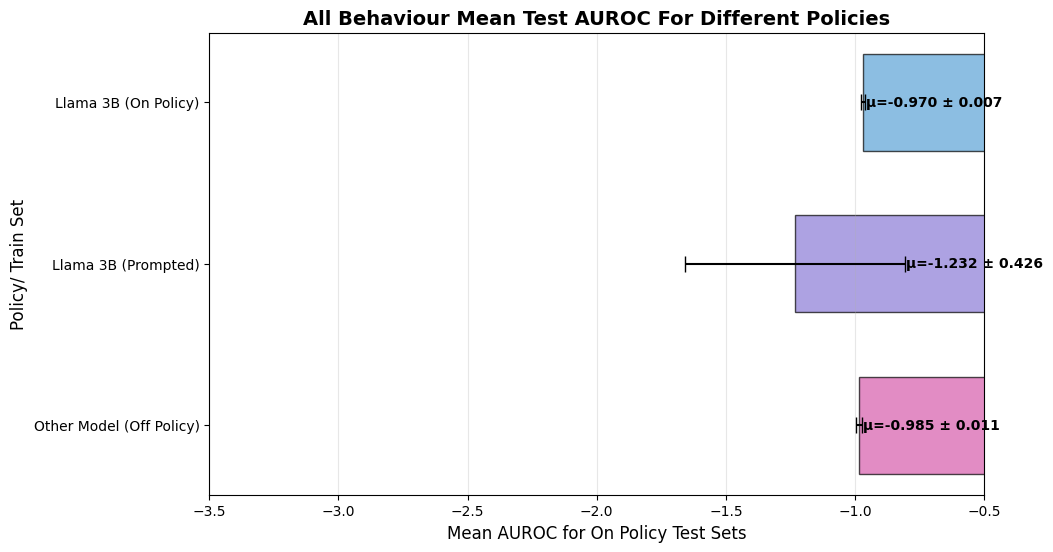

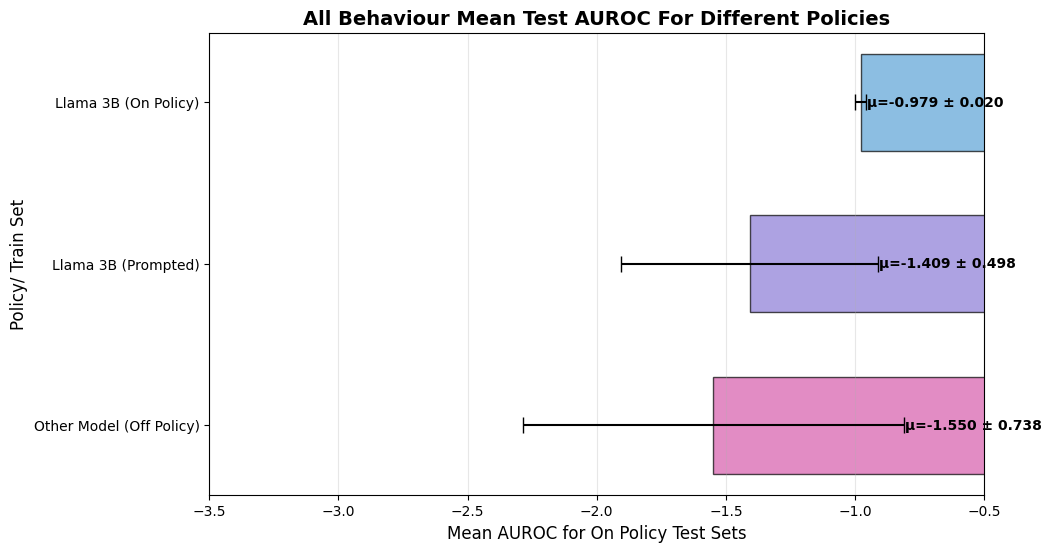

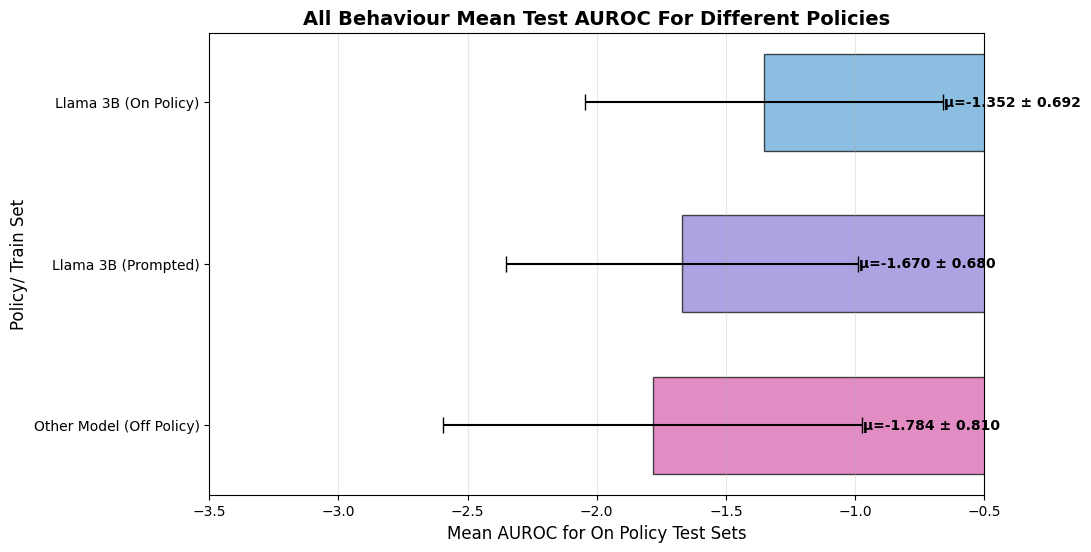

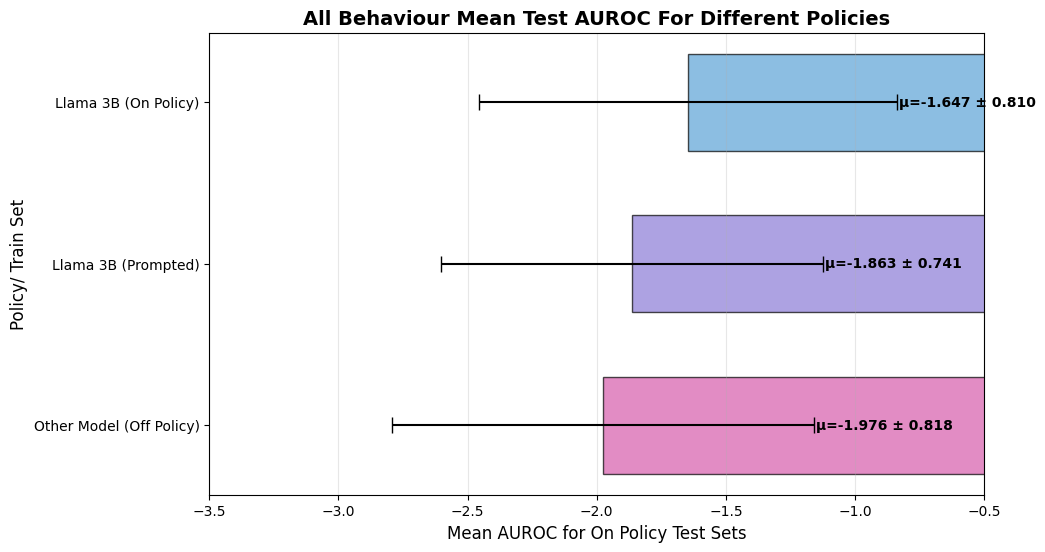

In [24]:
# Ranked data plots
import random

easy_data_list = [refusal_data, lists_data, metaphors_data, science_data]
easy_labels = ['Refusal', 'Lists', 'Metaphors', 'Science']
hard_data_list = easy_data_list + [syco_1_data, syco_2_data, deception_data]
hard_labels = easy_labels + ['Syco 1', 'Syco 2', 'Deception']

just_ood_data_list = [refusal_data_ood, refusal_data_ood2, lists_data_ood, lists_data_ood2, metaphors_data_ood, metaphors_data_ood2, syco_1_data_ood, syco_1_data_ood2, syco_2_data_ood]
just_ood_labels = ['Refusal OOD', 'Refusal OOD2', 'Lists OOD', 'Lists OOD2', 'Metaphors OOD', 'Metaphors OOD2', 'Syco 1 OOD', 'Syco 1 OOD2', 'Syco 2 OOD']
ood_data_list = hard_data_list + just_ood_data_list
ood_labels = hard_labels + just_ood_labels

for data_list, labels in [[easy_data_list, easy_labels], [hard_data_list, hard_labels], [ood_data_list, ood_labels], [just_ood_data_list, just_ood_labels]]:
    adjusted_data_list = deepcopy(data_list)
    for d in range(len(adjusted_data_list)):
        adjusted_data_list[d] = rank_columns(data_list[d], sf=2)
    bar1_data = [- float(dataset[0][0]) + (random.randint(0, 5) / 100) for dataset in adjusted_data_list]
    bar2_data = [- float(dataset[1][0]) + (random.randint(0, 5) / 100) for dataset in adjusted_data_list]
    bar3_data = [- float(dataset[2][0]) + (random.randint(0, 5) / 100) for dataset in adjusted_data_list]
    plt.style.use('default')
    fig2 = create_matplotlib_bar_plot(bar1_data, bar2_data, bar3_data, [-3.5,-0.5])
    plt.show()

## Violin Plots

In [ ]:
# Define plotting functions
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def create_seaborn_violin_plot(violin1_data, violin2_data, violin3_data, labels):
    # Prepare data for seaborn (long format)
    lablabs = ['Llama 3B (On Policy)', 'Llama 3B (Prompted)', 'Other Model (Off Policy)']
    data_for_plot = []
    for i, values in enumerate([violin1_data, violin2_data, violin3_data]):
        for j, value in enumerate(values):
            data_for_plot.append({
                'Violin': lablabs[i],
                'Dataset': labels[j],
                'Value': value
            })
    
    df = pd.DataFrame(data_for_plot)

    plt.figure(figsize=(10, 6))
    
    # Use consistent colors
    colors = ['#5CA3D6', '#8B7BD6', '#D65CAB']
    ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')
    sns.stripplot(data=df, y='Violin', x='Value', color='black', alpha=0.7, size=4, jitter=True, orient='h')

    plt.title('All Behaviour Test AUROC For Different Policies', fontsize=14, fontweight='bold')
    plt.ylabel('Policy/ Train Set', fontsize=12)
    plt.xlabel('AUROC for On Policy Test Set', fontsize=12)
    plt.grid(True, alpha=0.3)

    # Add statistics as text with consistent positioning
    for i, (name, values) in enumerate(zip(lablabs,
                                           [violin1_data, violin2_data, violin3_data])):
        mean_val = np.mean(values)
        plt.text(max(values) + 0.005, i, f'μ={mean_val:.3f}',
            ha='left', va='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    return plt.gcf()


def create_matplotlib_violin_plot(violin1_data, violin2_data, violin3_data):
    fig, ax = plt.subplots(figsize=(10, 6))
    violin_data = [violin1_data, violin2_data, violin3_data]
    positions = [3, 2, 1]

    parts = ax.violinplot(violin_data, positions=positions, widths=0.6,
                          showmeans=True, showmedians=True, showextrema=True, vert=False)

    # Use consistent colors
    colors = ['#5CA3D6', '#8B7BD6', '#D65CAB']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)

    for i, data in enumerate(violin_data):
        x = np.random.normal(positions[i], 0.04, size=len(data))
        ax.scatter(data, x, alpha=0.8, color='black', s=30, zorder=3)

    ax.set_yticks(positions)
    ax.set_yticklabels(['Llama 3B (On Policy)', 'Llama 3B (Prompted)', 'Other Model (Off Policy)'])
    ax.set_ylabel('Policy/ Train Set', fontsize=12)
    ax.set_xlabel('AUROC for On Policy Test Set', fontsize=12)
    ax.set_title('All Behaviour Test AUROC For Different Policies', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Add mean annotations with consistent positioning
    for i, data in enumerate(violin_data):
        mean_val = np.mean(data)
        ax.text(max(data) + 0.005, positions[i], f'μ={mean_val:.3f}',
            ha='left', va='center', fontsize=10, fontweight='bold')
    return fig


def detailed_analysis(violin1_data, violin2_data, violin3_data):
    stats_data = []
    for name, values in zip(['Llama 3B (On Policy)', 'Llama 3B (Prompted)', 'Other Model (Off Policy)'],
                            [violin1_data, violin2_data, violin3_data]):
        stats = {
            'Condition': name,
            'Mean': np.mean(values),
            'Median': np.median(values),
            'Std': np.std(values),
            'Min': np.min(values),
             'Max': np.max(values),
            'Values': values
        }
        stats_data.append(stats)

    print("\nDetailed Statistics:")
    print("-" * 80)
    for stats in stats_data:
        print(f"{stats['Condition']}:")
        print(f"  Mean: {stats['Mean']:.3f}")
        print(f"  Median: {stats['Median']:.3f}")
        print(f"  Std: {stats['Std']:.3f}")
        print(f"  Range: [{stats['Min']:.3f}, {stats['Max']:.3f}]")
        print(f"  Values: {[f'{v:.3f}' for v in stats['Values']]}")
        print()

    return stats_data

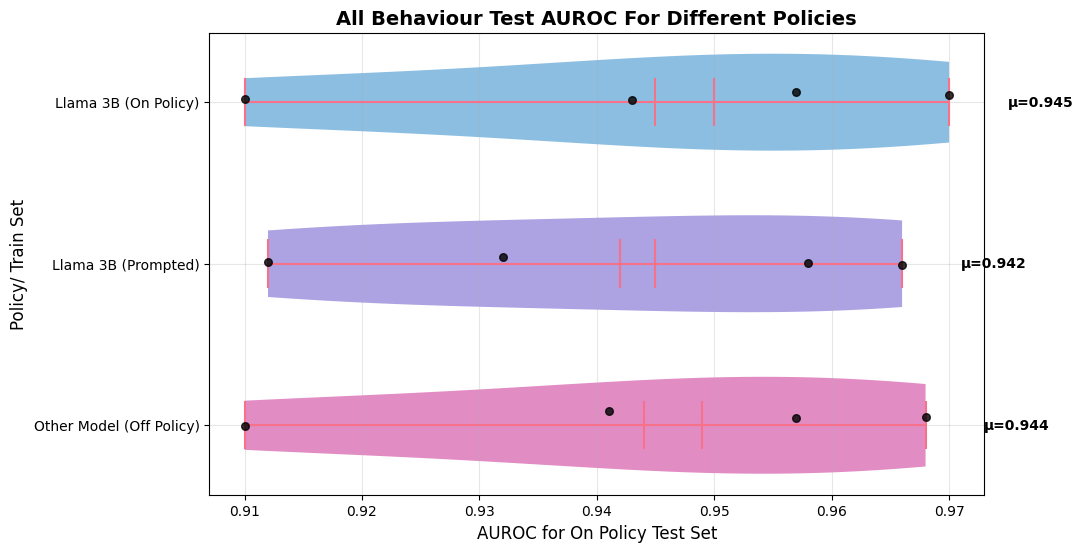

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


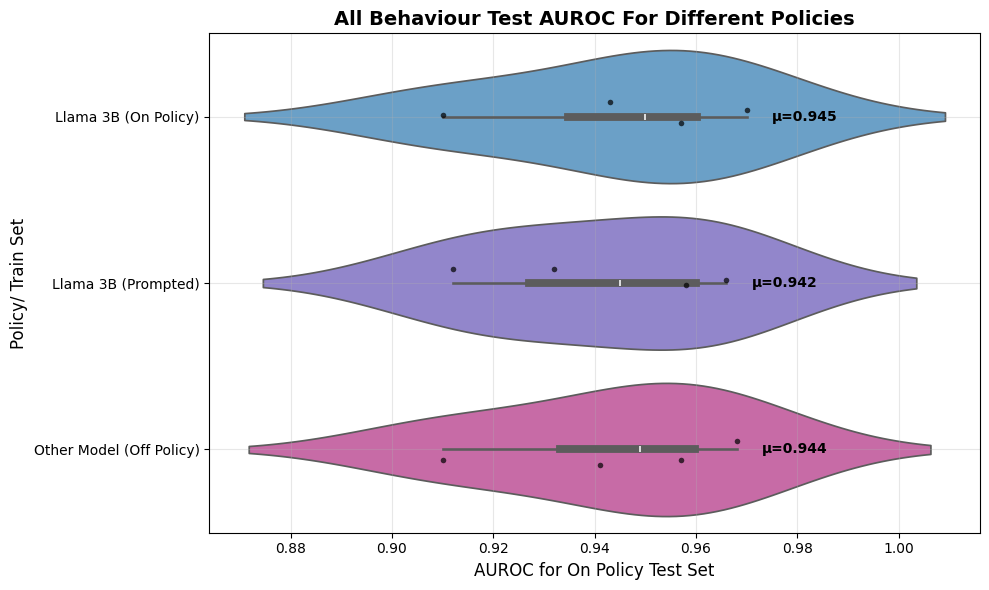

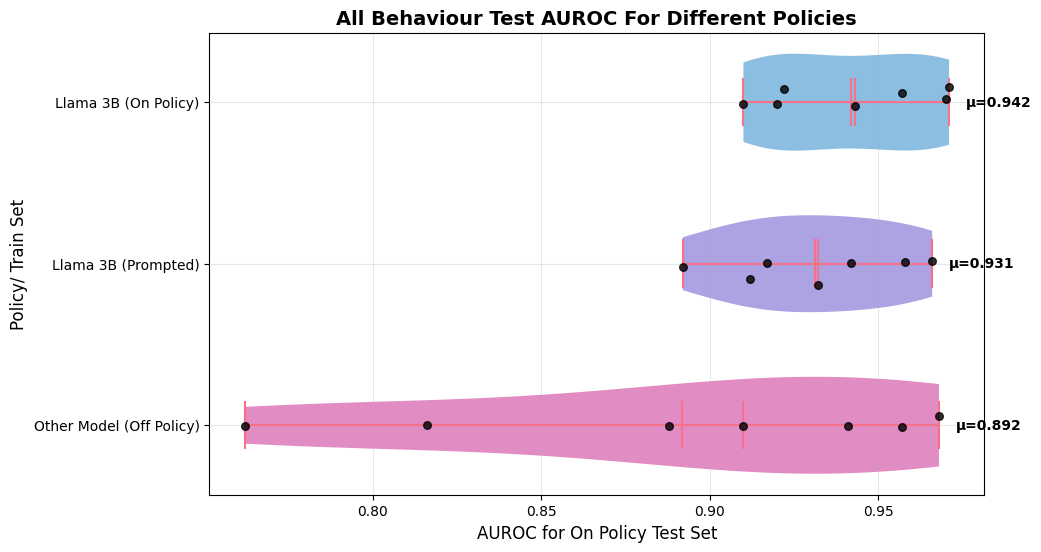

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


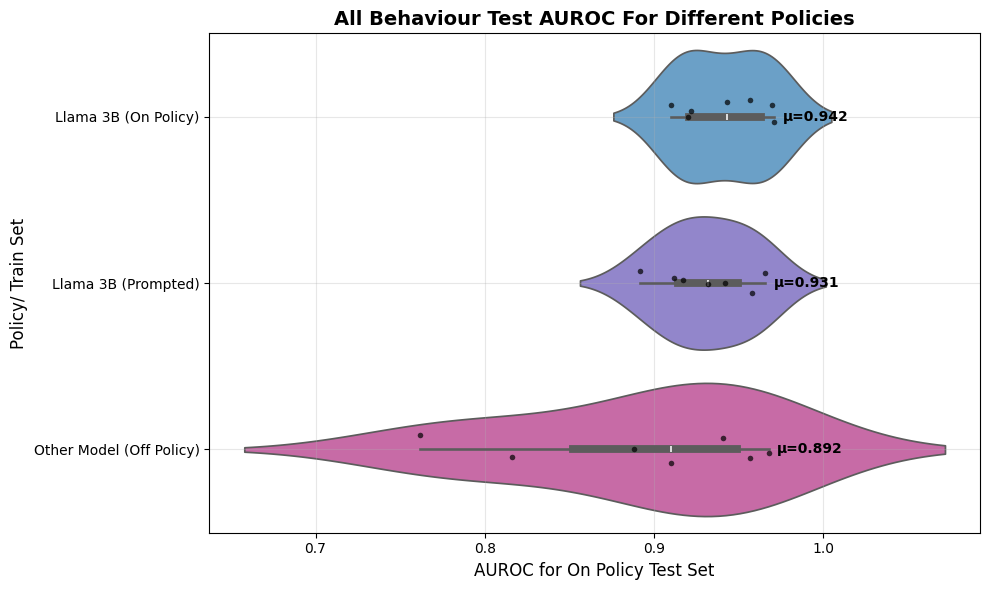

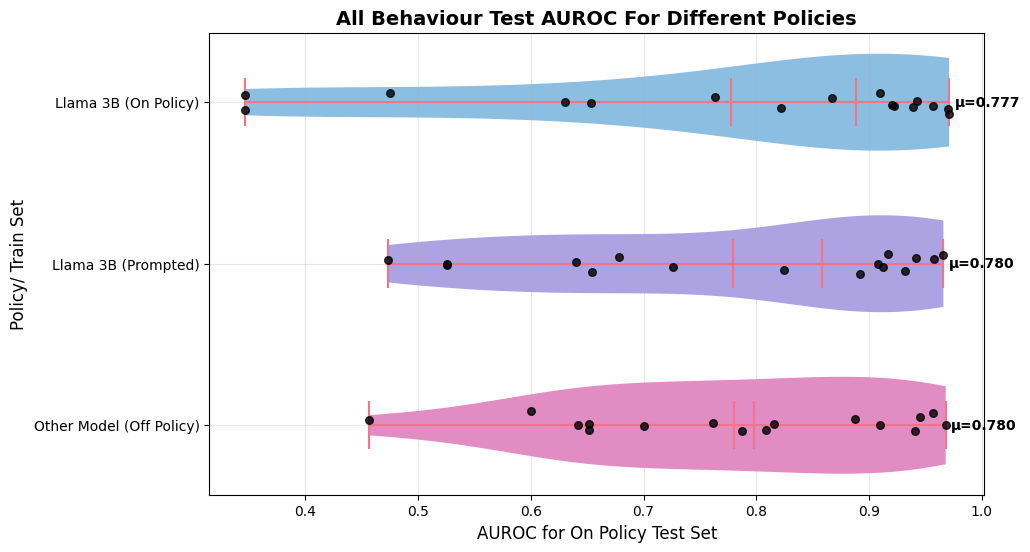

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


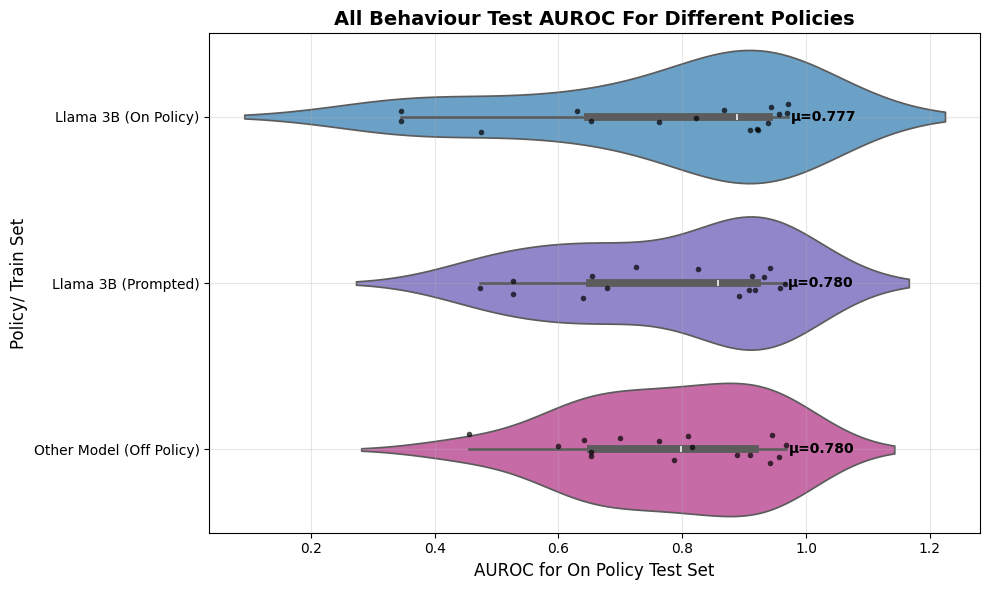

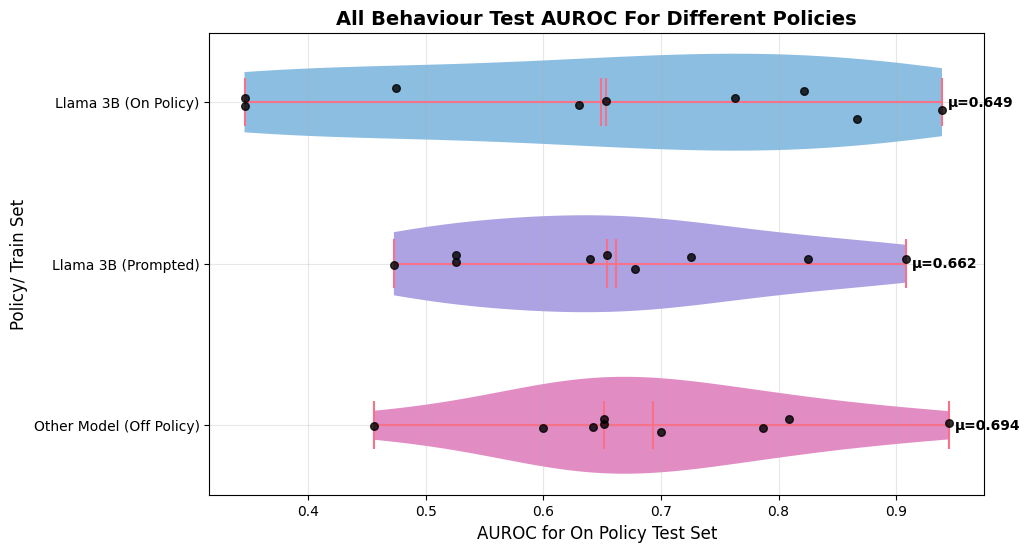

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


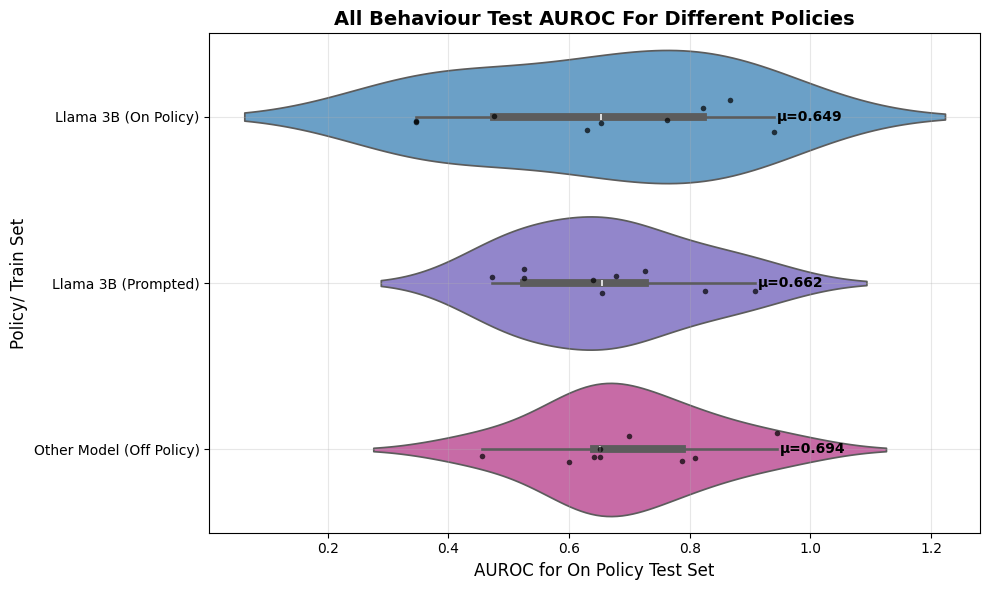

In [ ]:
# Normal plots
easy_data_list = [refusal_data, lists_data, metaphors_data, science_data]
easy_labels = ['Refusal', 'Lists', 'Metaphors', 'Science']
hard_data_list = easy_data_list + [syco_1_data, syco_2_data, deception_data]
hard_labels = easy_labels + ['Syco 1', 'Syco 2', 'Deception']

just_ood_data_list = [refusal_data_ood, refusal_data_ood2, lists_data_ood, lists_data_ood2, metaphors_data_ood, metaphors_data_ood2, syco_1_data_ood, syco_1_data_ood2, syco_2_data_ood]
just_ood_labels = ['Refusal OOD', 'Refusal OOD2', 'Lists OOD', 'Lists OOD2', 'Metaphors OOD', 'Metaphors OOD2', 'Syco 1 OOD', 'Syco 1 OOD2', 'Syco 2 OOD']
ood_data_list = hard_data_list + just_ood_data_list
ood_labels = hard_labels + just_ood_labels

for data_list, labels in [[easy_data_list, easy_labels], [hard_data_list, hard_labels], [ood_data_list, ood_labels], [just_ood_data_list, just_ood_labels]]:
    violin1_data = [float(dataset[0][0]) for dataset in data_list]
    violin2_data = [float(dataset[1][0]) for dataset in data_list]
    violin3_data = [float(dataset[2][0]) for dataset in data_list]
    plt.style.use('default')
    sns.set_palette("husl")
    fig2 = create_matplotlib_violin_plot(violin1_data, violin2_data, violin3_data)
    plt.show()
    fig1 = create_seaborn_violin_plot(violin1_data, violin2_data, violin3_data, labels)
    plt.show()

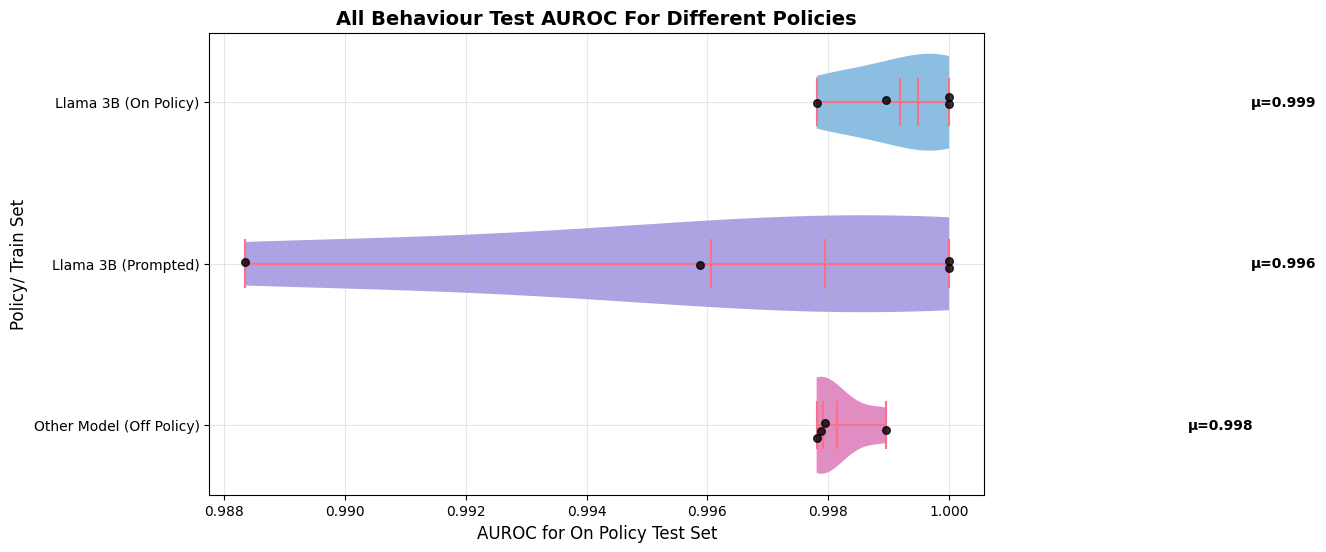

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


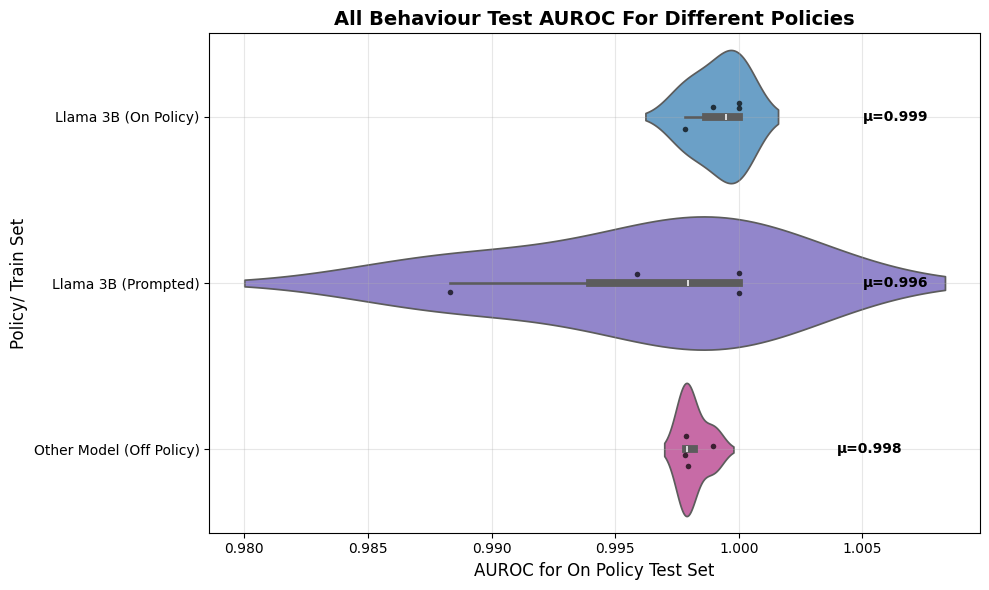

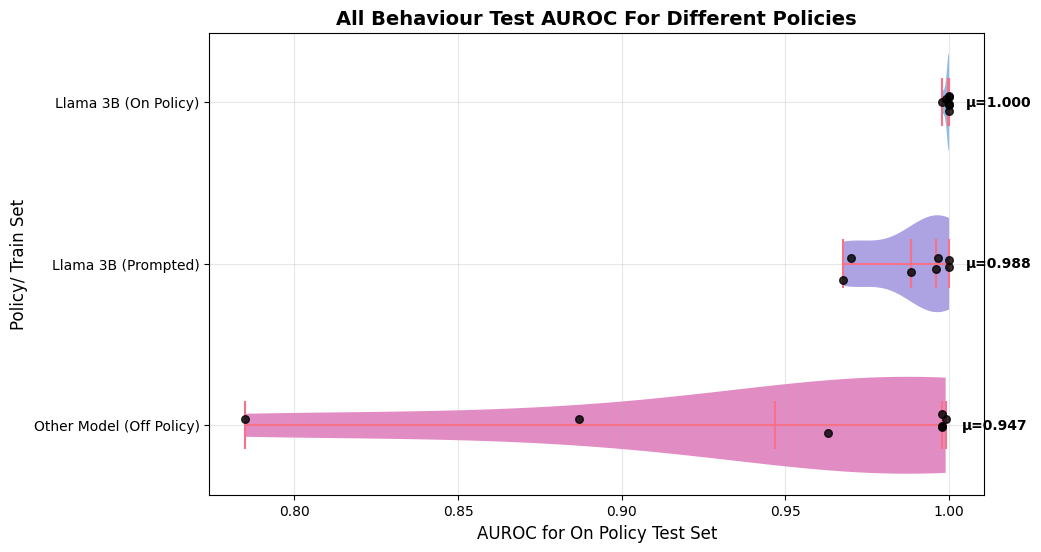

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


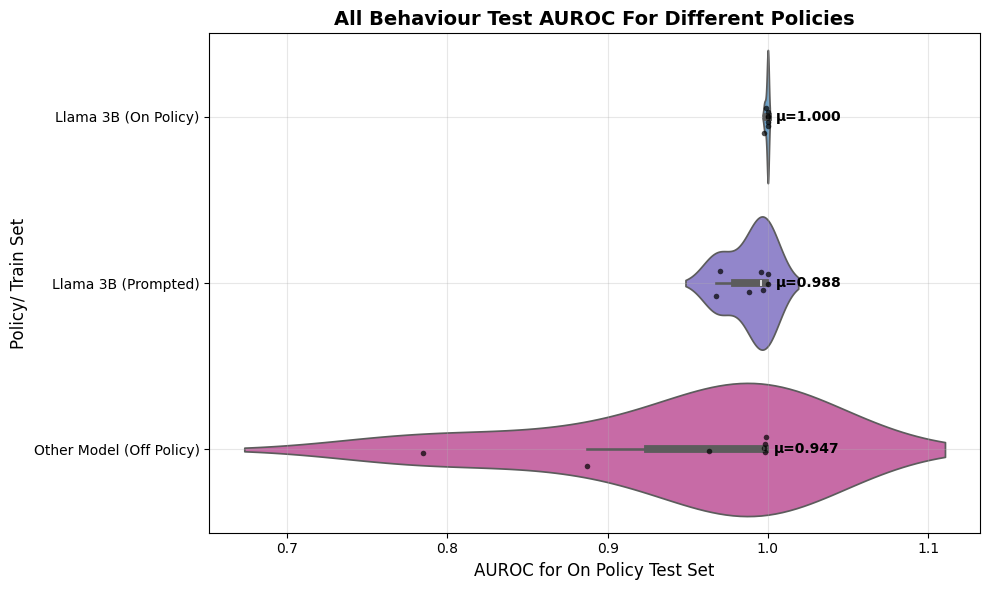

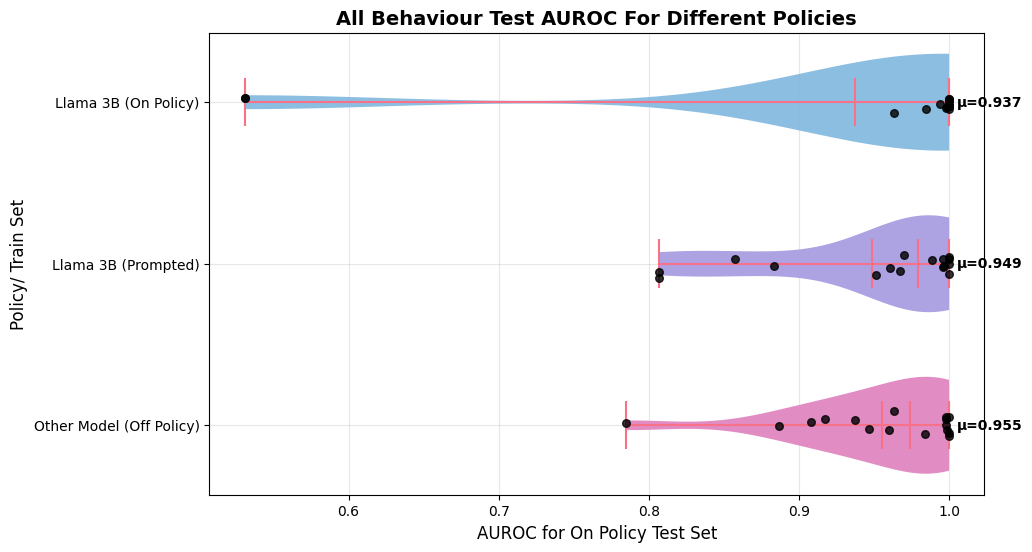

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


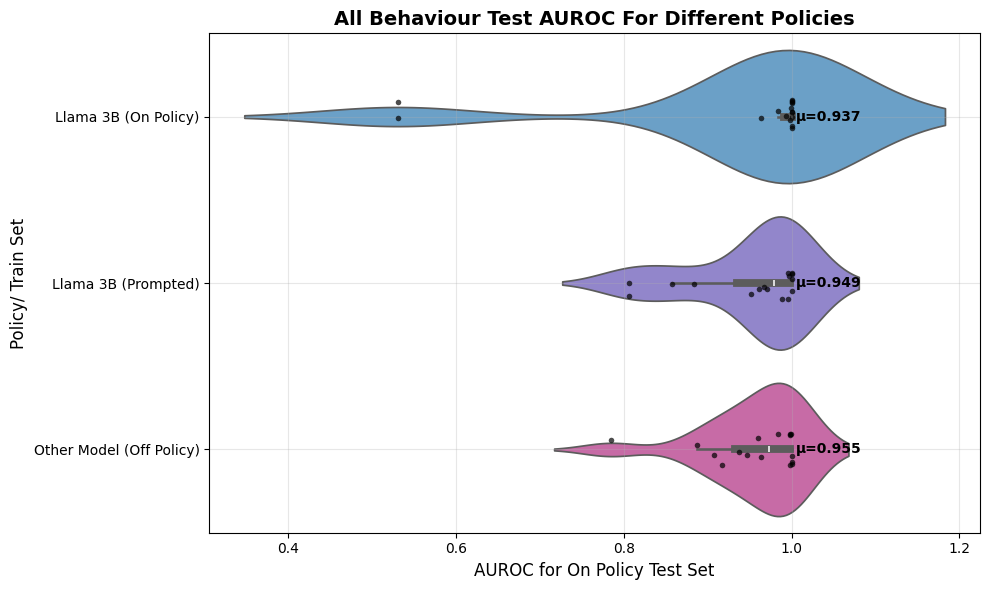

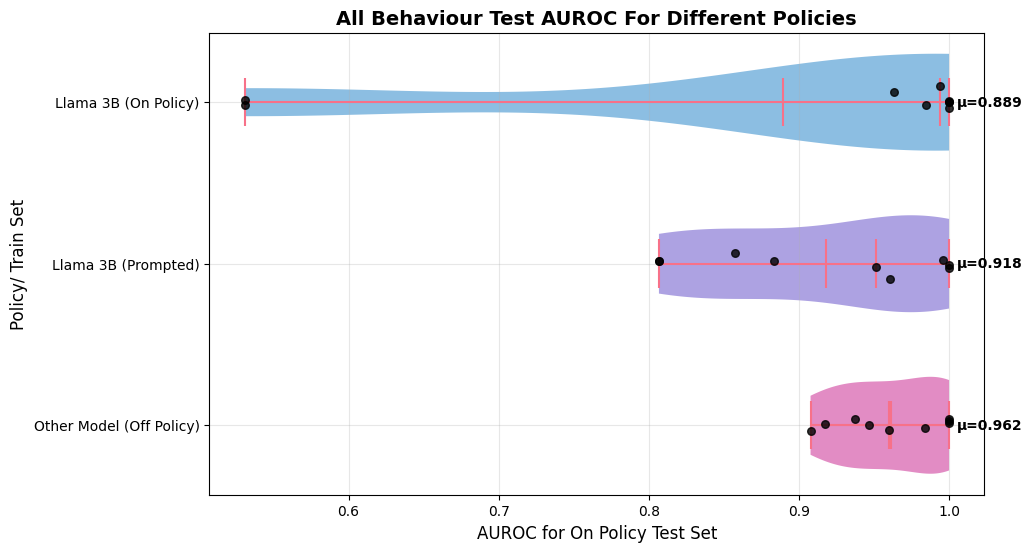

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


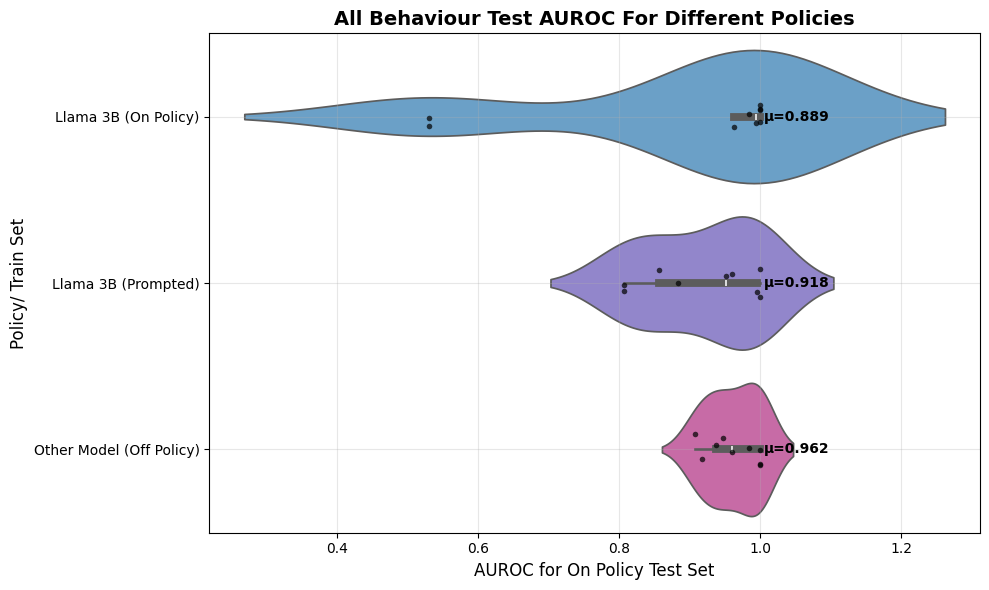

In [ ]:
# Normalised data plots
from copy import deepcopy

easy_data_list = [refusal_data, lists_data, metaphors_data, science_data]
easy_labels = ['Refusal', 'Lists', 'Metaphors', 'Science']
hard_data_list = easy_data_list + [syco_1_data, syco_2_data, deception_data]
hard_labels = easy_labels + ['Syco 1', 'Syco 2', 'Deception']

just_ood_data_list = [refusal_data_ood, refusal_data_ood2, lists_data_ood, lists_data_ood2, metaphors_data_ood, metaphors_data_ood2, syco_1_data_ood, syco_1_data_ood2, syco_2_data_ood]
just_ood_labels = ['Refusal OOD', 'Refusal OOD2', 'Lists OOD', 'Lists OOD2', 'Metaphors OOD', 'Metaphors OOD2', 'Syco 1 OOD', 'Syco 1 OOD2', 'Syco 2 OOD']
ood_data_list = hard_data_list + just_ood_data_list
ood_labels = hard_labels + just_ood_labels

for data_list, labels in [[easy_data_list, easy_labels], [hard_data_list, hard_labels], [ood_data_list, ood_labels], [just_ood_data_list, just_ood_labels]]:
    adjusted_data_list = deepcopy(data_list)
    for d in range(len(adjusted_data_list)):
        col_max = max([r[0] for r in adjusted_data_list[d]])
        for row in range(3):
            adjusted_data_list[d][row][0] = data_list[d][row][0] / col_max
    violin1_data = [float(dataset[0][0]) for dataset in adjusted_data_list]
    violin2_data = [float(dataset[1][0]) for dataset in adjusted_data_list]
    violin3_data = [float(dataset[2][0]) for dataset in adjusted_data_list]
    plt.style.use('default')
    sns.set_palette("husl")
    fig2 = create_matplotlib_violin_plot(violin1_data, violin2_data, violin3_data)
    plt.show()
    fig1 = create_seaborn_violin_plot(violin1_data, violin2_data, violin3_data, labels)
    plt.show()

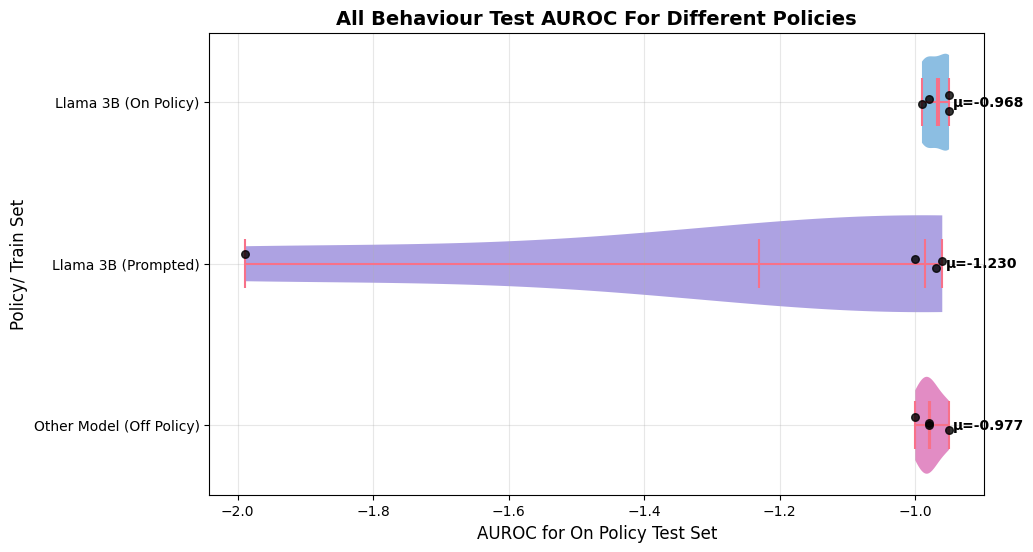

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


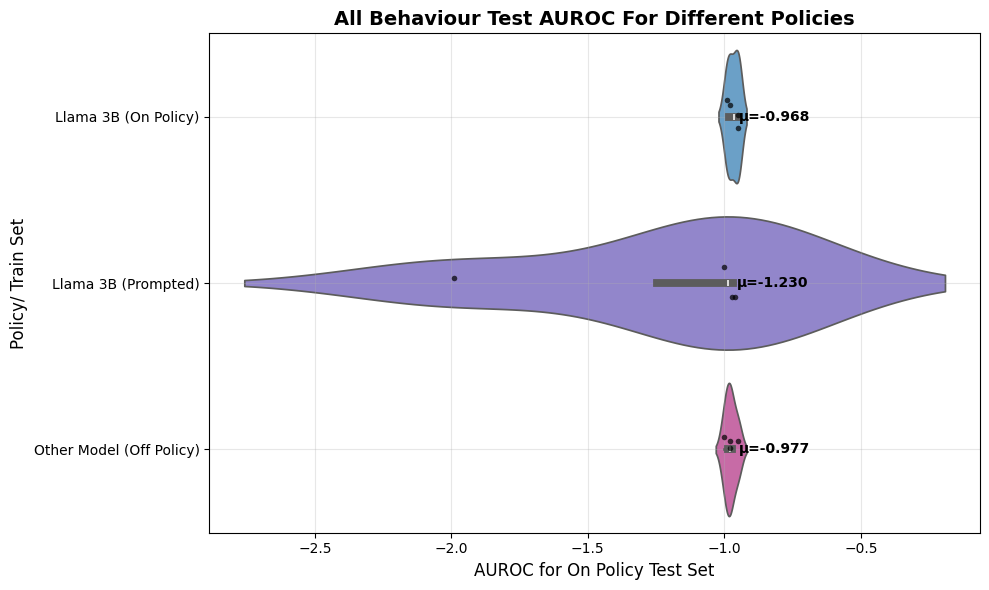

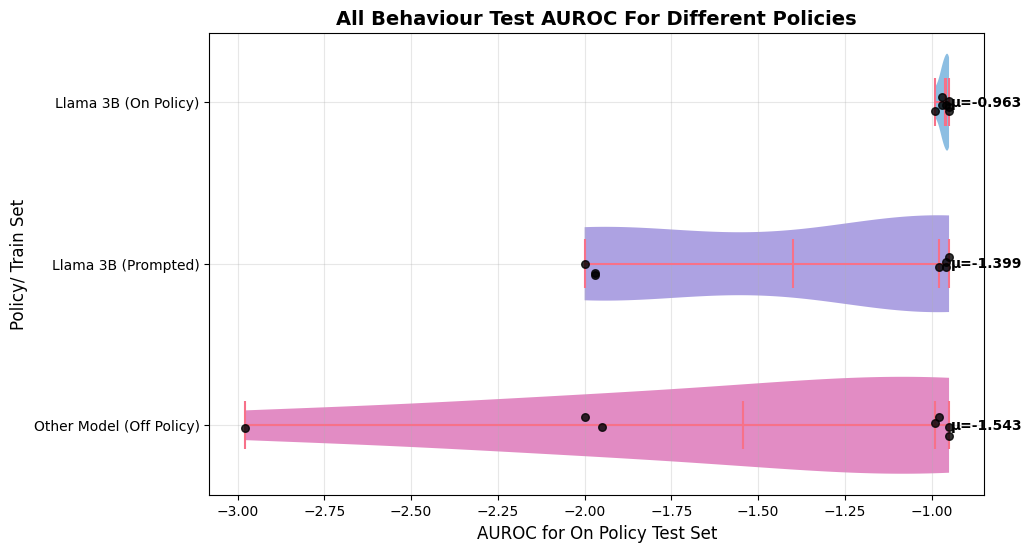

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


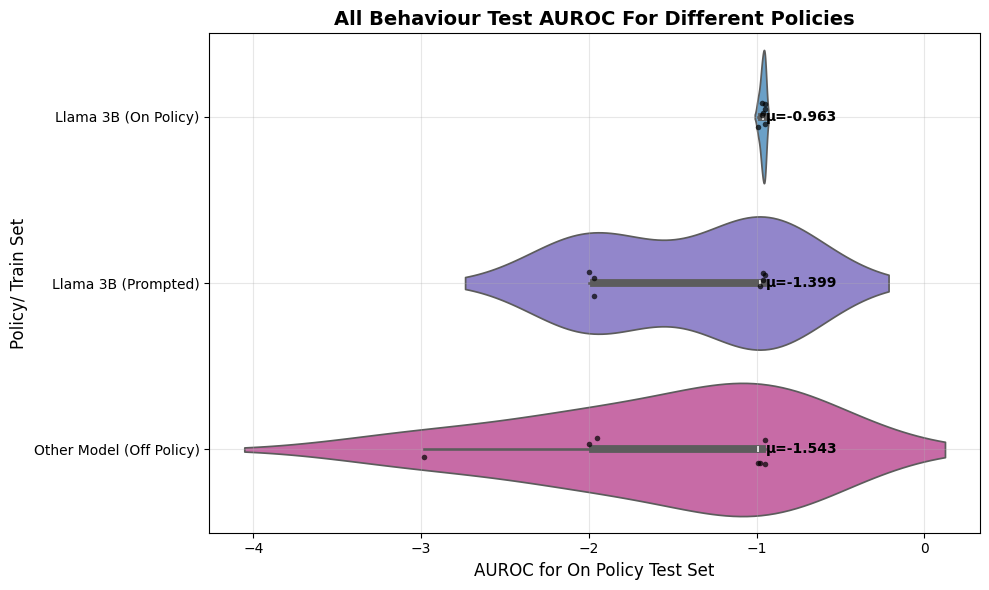

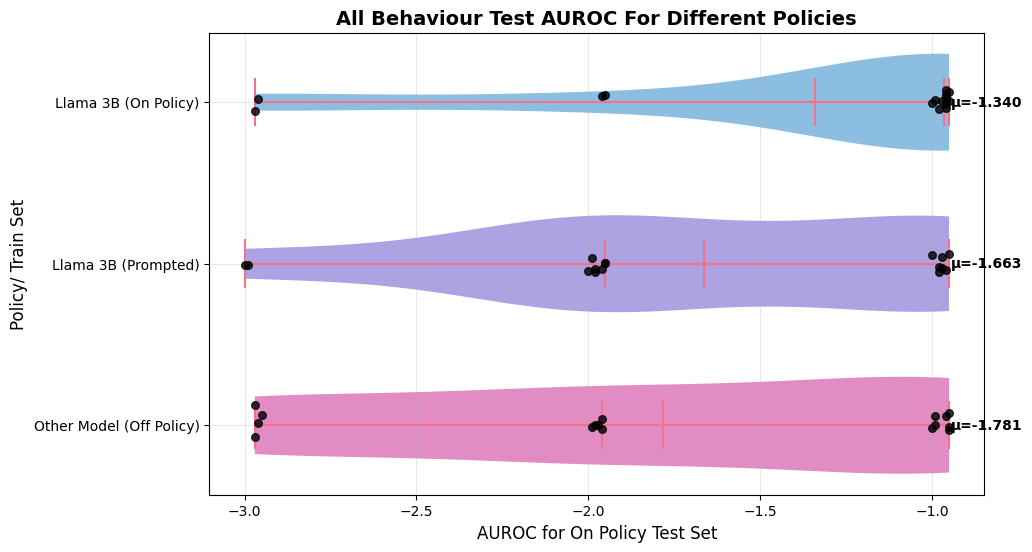

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


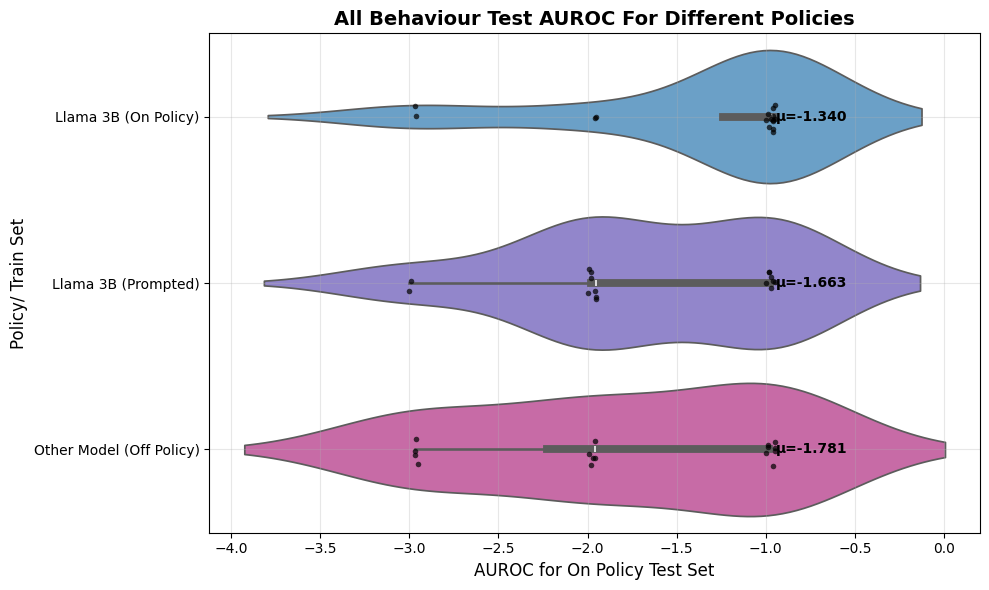

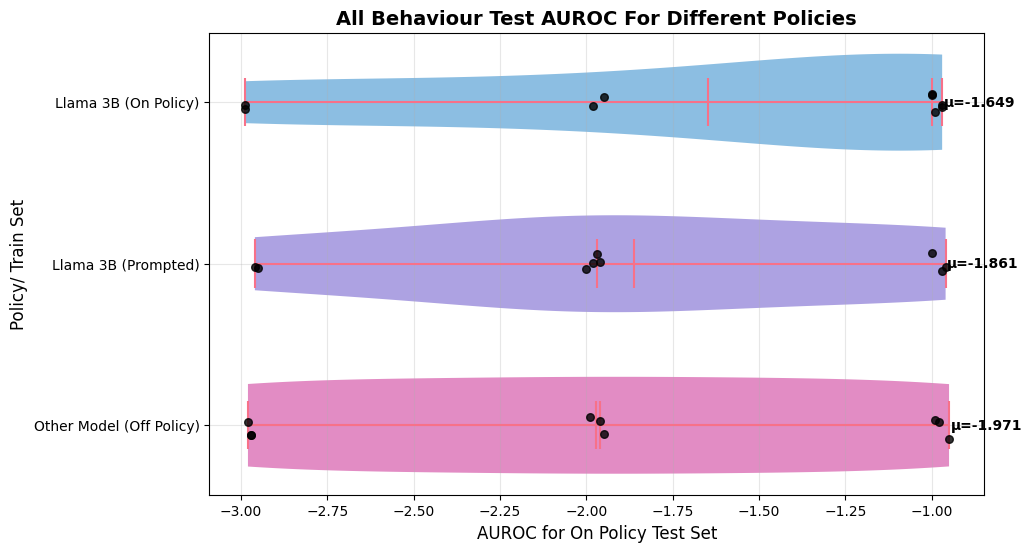

/tmp/ipykernel_410122/3322588782.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, y='Violin', x='Value', inner='box', palette=colors, orient='h')


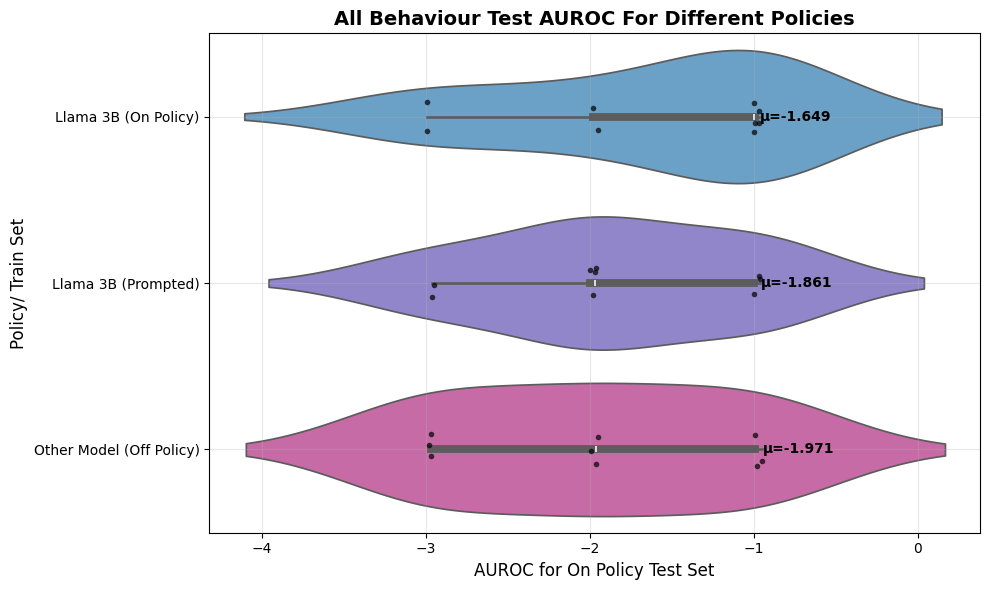

In [ ]:
# Ranked data plots
import random

easy_data_list = [refusal_data, lists_data, metaphors_data, science_data]
easy_labels = ['Refusal', 'Lists', 'Metaphors', 'Science']
hard_data_list = easy_data_list + [syco_1_data, syco_2_data, deception_data]
hard_labels = easy_labels + ['Syco 1', 'Syco 2', 'Deception']

just_ood_data_list = [refusal_data_ood, refusal_data_ood2, lists_data_ood, lists_data_ood2, metaphors_data_ood, metaphors_data_ood2, syco_1_data_ood, syco_1_data_ood2, syco_2_data_ood]
just_ood_labels = ['Refusal OOD', 'Refusal OOD2', 'Lists OOD', 'Lists OOD2', 'Metaphors OOD', 'Metaphors OOD2', 'Syco 1 OOD', 'Syco 1 OOD2', 'Syco 2 OOD']
ood_data_list = hard_data_list + just_ood_data_list
ood_labels = hard_labels + just_ood_labels

for data_list, labels in [[easy_data_list, easy_labels], [hard_data_list, hard_labels], [ood_data_list, ood_labels], [just_ood_data_list, just_ood_labels]]:
    adjusted_data_list = deepcopy(data_list)
    for d in range(len(adjusted_data_list)):
        adjusted_data_list[d] = rank_columns(data_list[d], sf=2)
    violin1_data = [- float(dataset[0][0]) + (random.randint(0, 5) / 100) for dataset in adjusted_data_list]
    violin2_data = [- float(dataset[1][0]) + (random.randint(0, 5) / 100) for dataset in adjusted_data_list]
    violin3_data = [- float(dataset[2][0]) + (random.randint(0, 5) / 100) for dataset in adjusted_data_list]
    plt.style.use('default')
    sns.set_palette("husl")
    fig2 = create_matplotlib_violin_plot(violin1_data, violin2_data, violin3_data)
    plt.show()
    fig1 = create_seaborn_violin_plot(violin1_data, violin2_data, violin3_data, labels)
    plt.show()

## Grid Plot Variations

In [52]:
# Define plotting functions
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

def generate_heatmap(plot_data, g_args={"cmap": "Greens", "vmin": 0.3, "vmax": 1}, title=None, column_only=False):
    fig, ax = plt.subplots()

    # Create the heatmap with seaborn
    if column_only:
        xticklabels = ['Llama 3B (On Policy)']
        new_plot_data = [[plot_data[0][0]], [plot_data[1][0]], [plot_data[2][0]]]
    else:
        xticklabels = ['Llama 3B (On Policy)', 'Llama 3B (Prompted)', 'Other Model (Off Policy)']
        new_plot_data = plot_data
    sns.heatmap(
        new_plot_data, 
        yticklabels=['Llama 3B (On Policy)', 'Llama 3B (Prompted)', 'Other Model (Off Policy)'],
        xticklabels=xticklabels,
        annot=True,  # This adds the text annotations
        fmt='.2f',   # Format numbers to 3 decimal places
        cmap=g_args["cmap"],  # You can change the colormap
        vmin=g_args["vmin"],
        vmax=g_args["vmax"],
        ax=ax,
        annot_kws={"size": 10}
    )

    # Rotate x-axis labels
    #plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

    # Set labels and title
    plt.xlabel('Test Set', fontsize=9)
    plt.xticks(fontsize=8)
    plt.ylabel('Policy/ Train Set', fontsize=9)
    plt.yticks(fontsize=8)
    if title is not None:
        ax.set_title(title, fontsize=9)

    # increase graph size
    if column_only:
        fig.set_size_inches(1.5, 3)
    else:
        fig.set_size_inches(4, 3)
    # fig.tight_layout()
    plt.show()


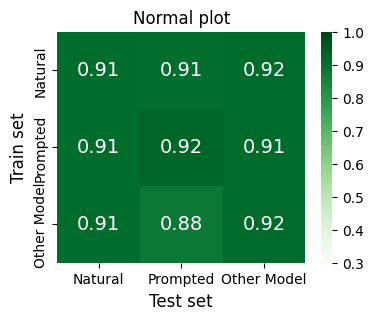

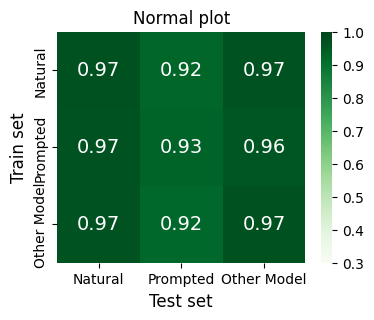

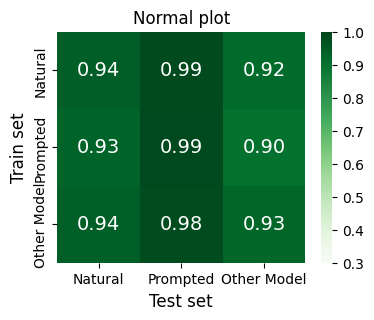

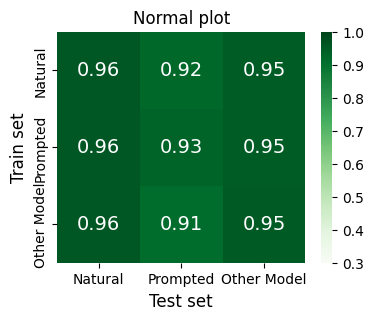

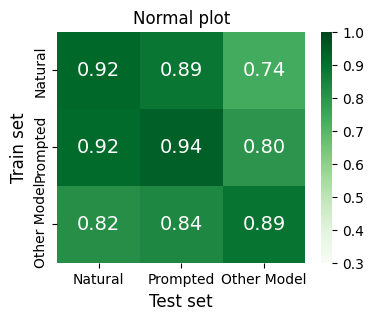

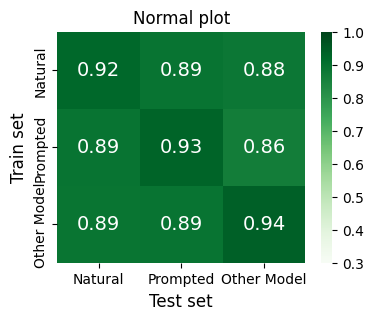

In [ ]:
# Plot normal graphs
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    generate_heatmap(plot_data, title="Normal plot")

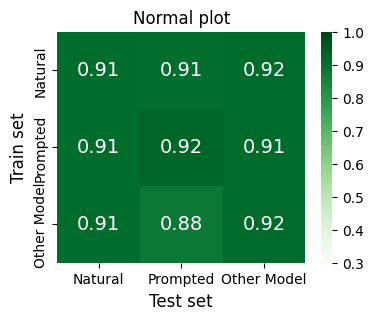

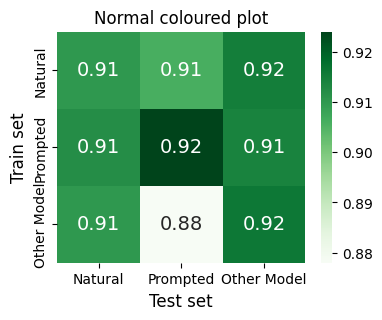

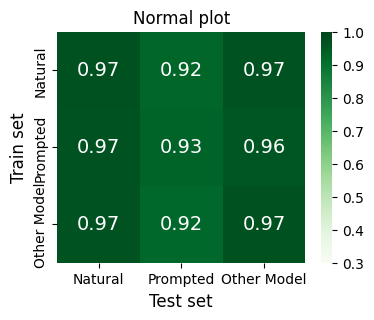

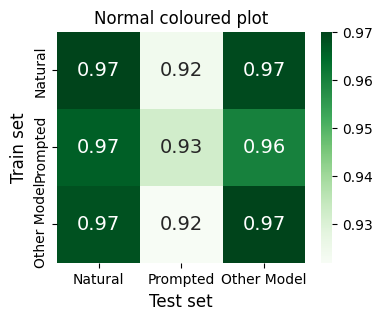

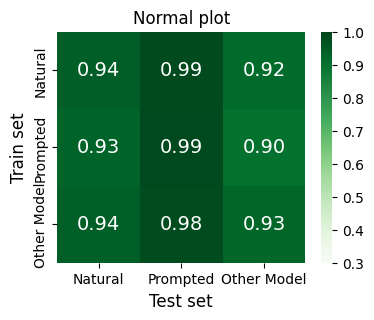

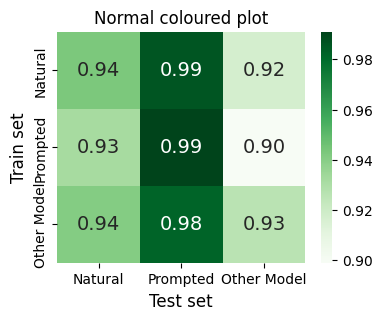

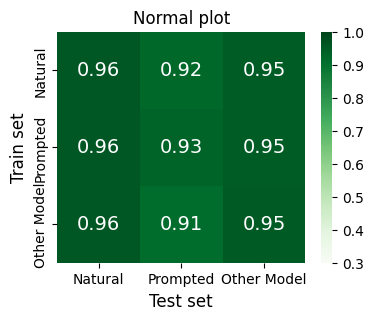

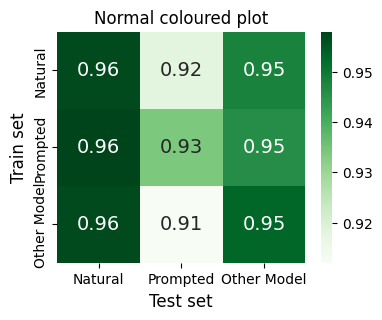

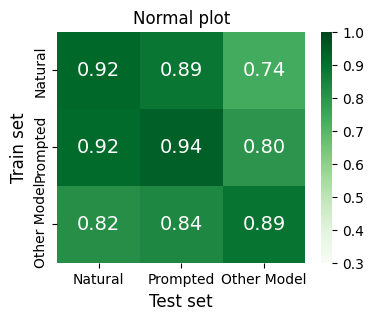

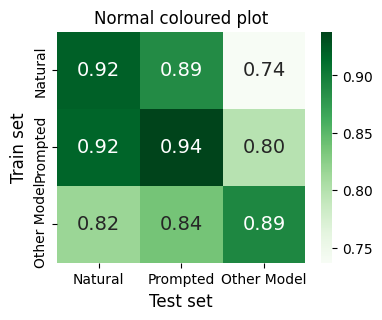

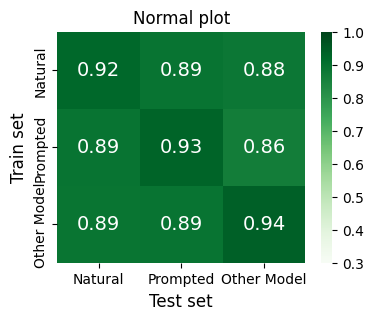

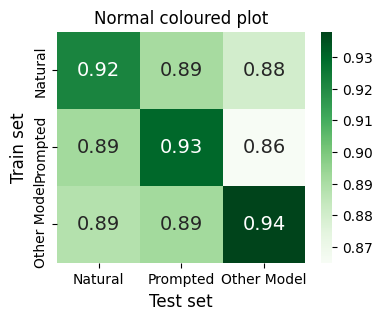

In [ ]:
# Plot graphs with colouring
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    max_val = max([max([c for c in r]) for r in plot_data])
    min_val = min([min([c for c in r]) for r in plot_data])
    generate_heatmap(plot_data, title="Normal plot")
    generate_heatmap(plot_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normal coloured plot")

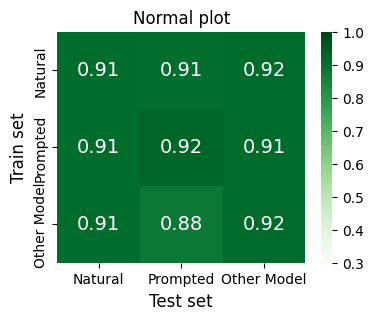

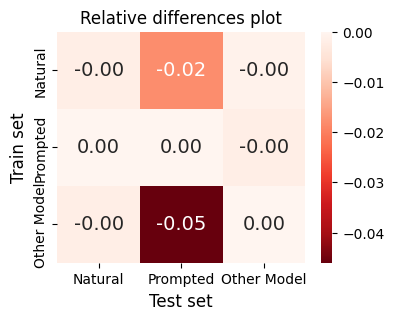

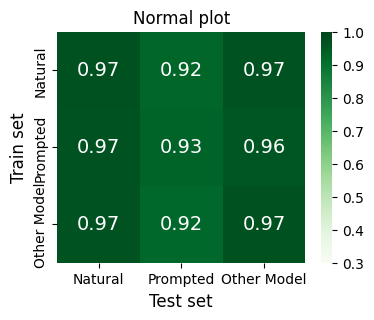

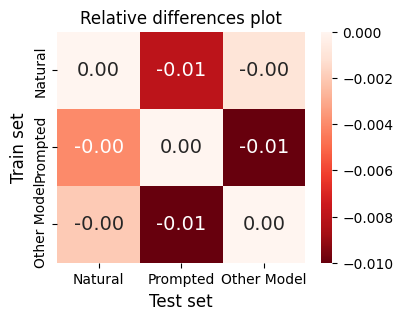

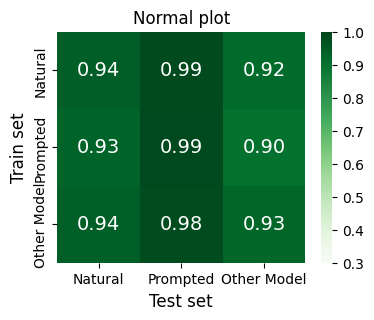

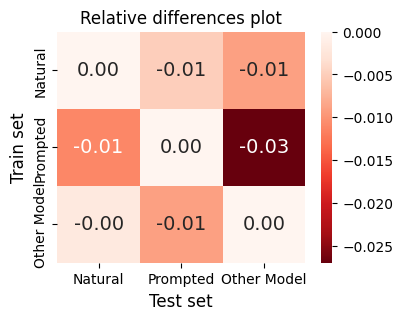

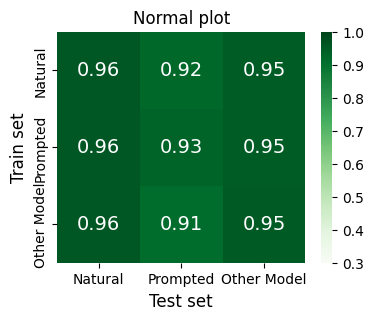

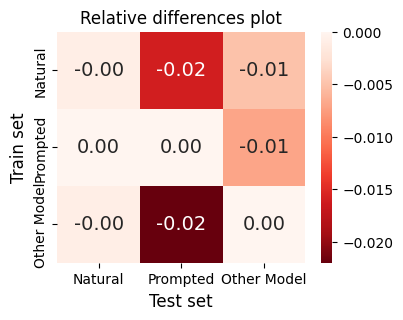

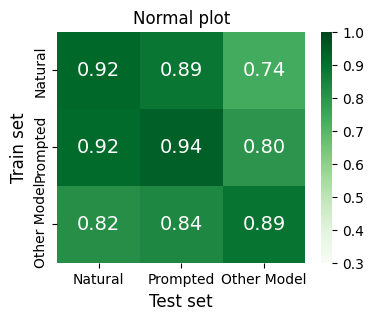

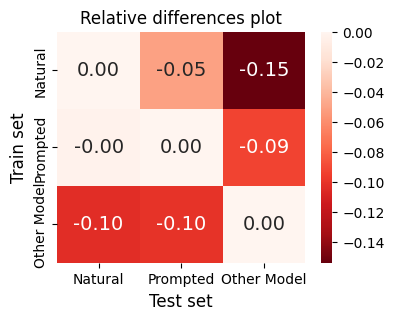

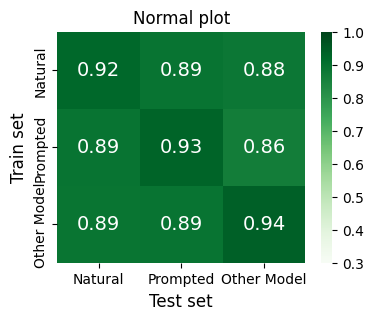

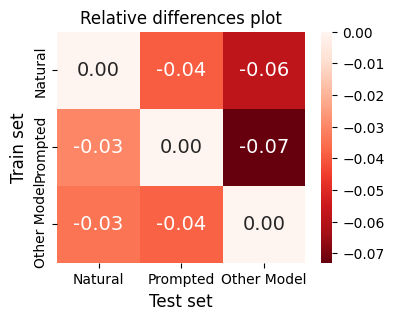

In [7]:
# Plot graphs with relative differences
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    adjusted_plot_data = deepcopy(plot_data)
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            adjusted_plot_data[row][col] = plot_data[row][col] - col_max
    generate_heatmap(plot_data, title="Normal plot")
    generate_heatmap(adjusted_plot_data, g_args={"cmap": "Reds_r", "vmin": None, "vmax": None}, title="Relative differences plot")

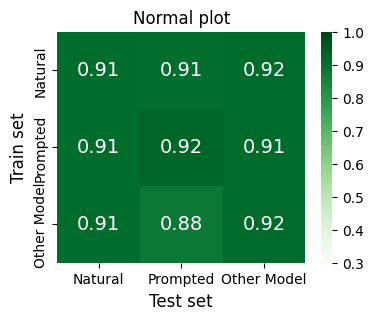

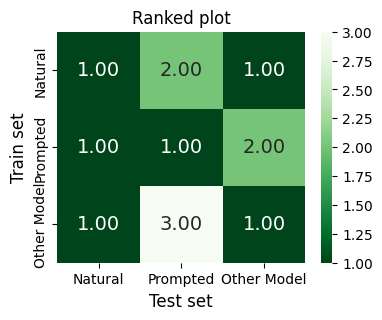

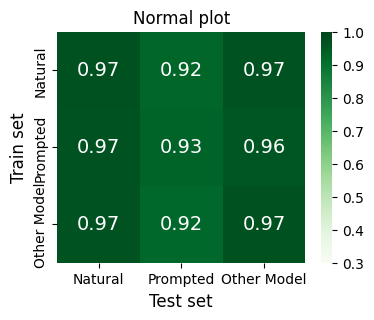

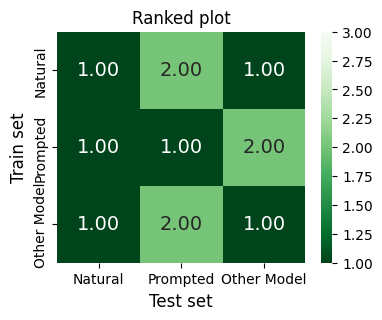

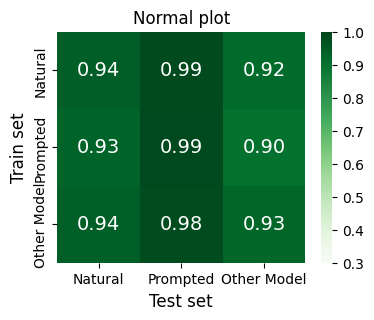

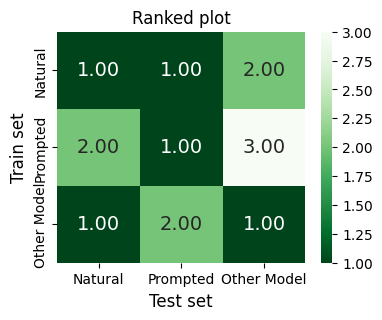

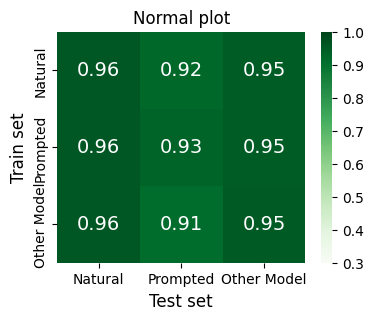

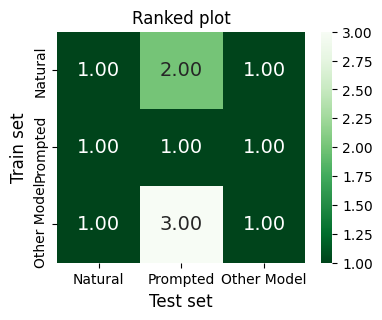

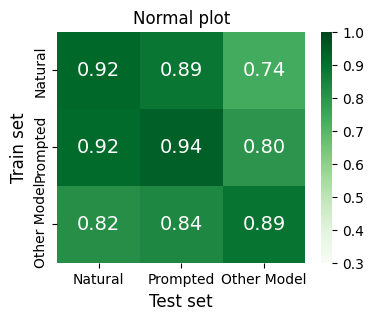

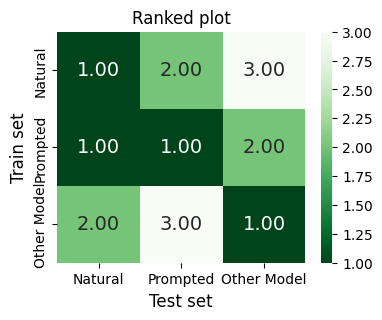

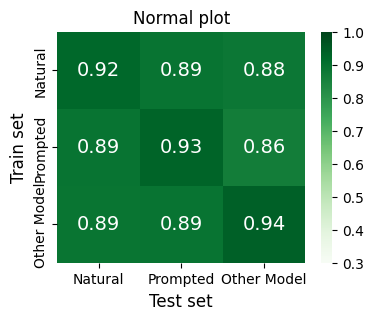

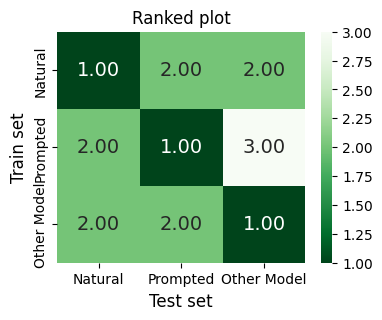

In [15]:
# Plot graph ranks
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    adjusted_plot_data = rank_columns(plot_data, sf=2)
    generate_heatmap(plot_data, title="Normal plot")
    generate_heatmap(adjusted_plot_data, g_args={"cmap": "Greens_r", "vmin": 1, "vmax": 3}, title="Ranked plot")

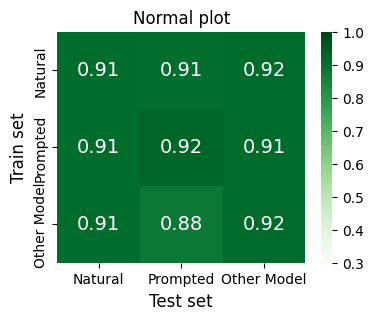

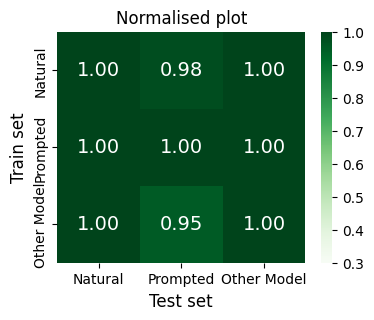

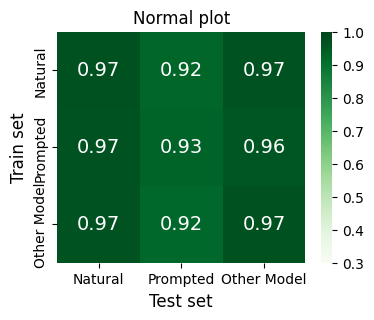

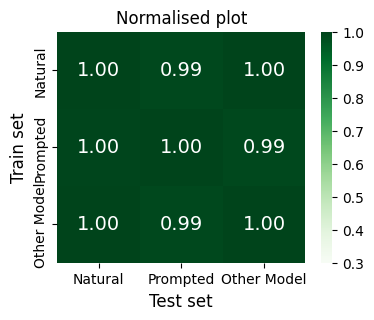

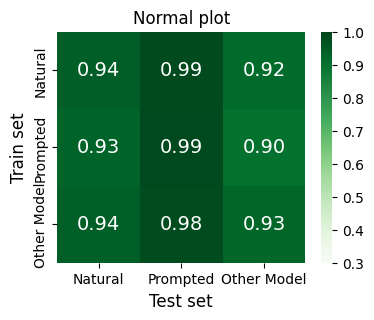

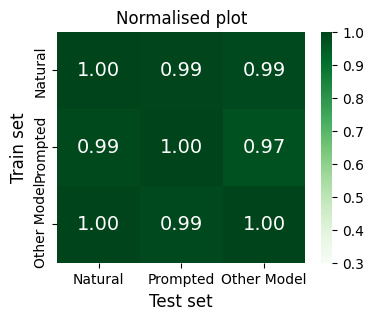

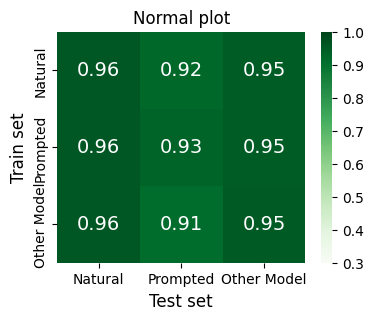

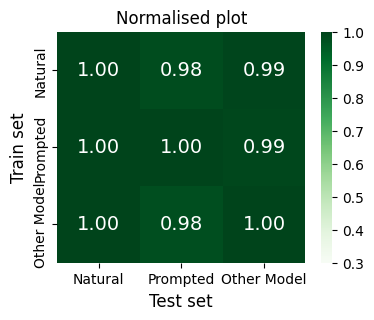

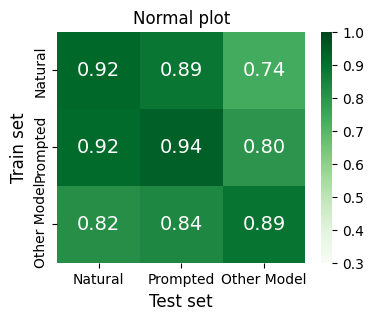

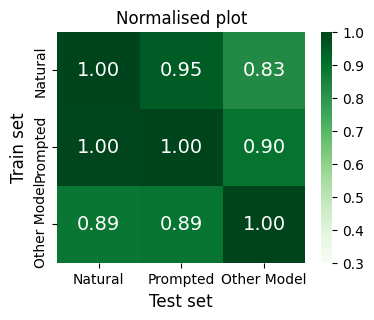

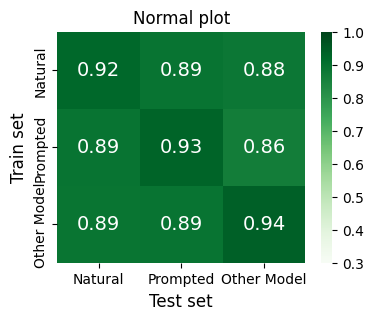

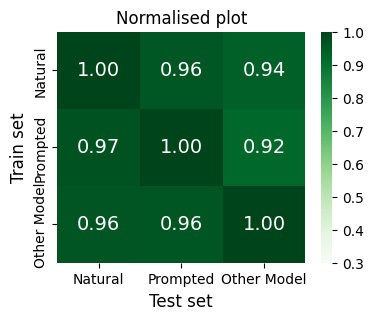

In [8]:
# Plot graphs normalised
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    adjusted_plot_data = deepcopy(plot_data)
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            adjusted_plot_data[row][col] = (plot_data[row][col] / col_max)
    generate_heatmap(plot_data, title="Normal plot")
    generate_heatmap(adjusted_plot_data, title="Normalised plot")

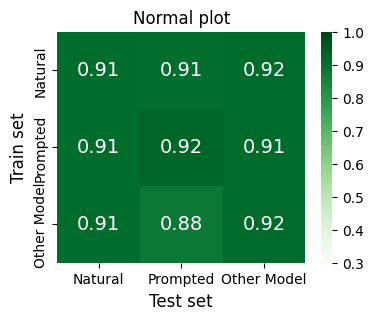

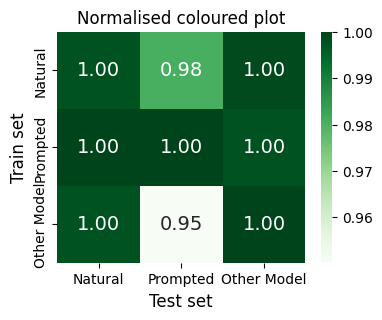

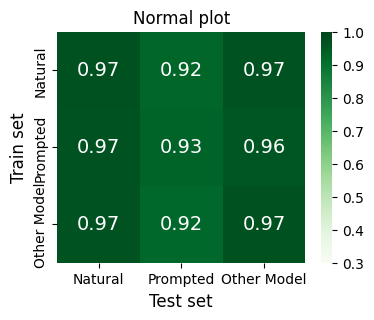

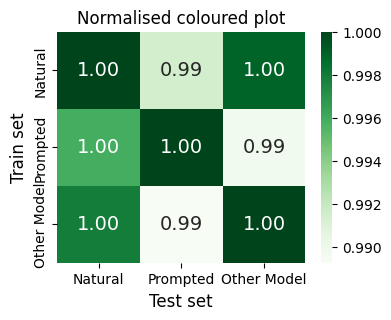

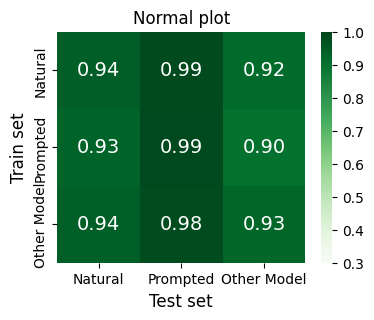

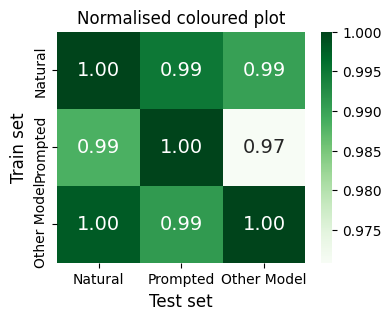

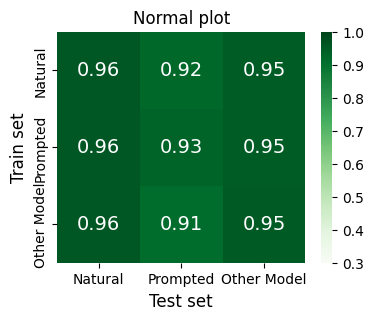

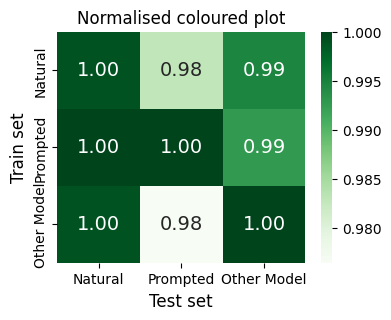

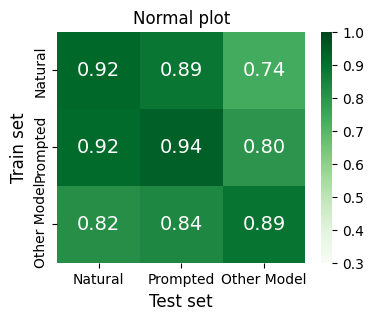

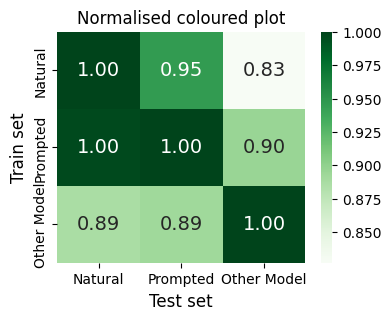

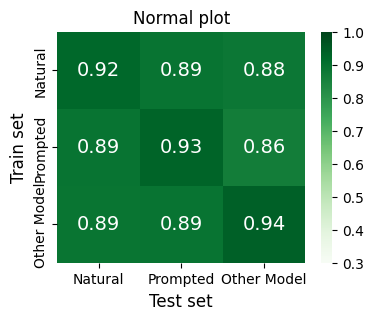

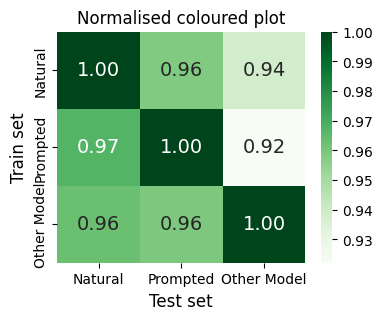

In [14]:
# Plot graphs normalised coloured
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
for plot_data in data_list:
    adjusted_plot_data = deepcopy(plot_data)
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            adjusted_plot_data[row][col] = (plot_data[row][col] / col_max)
    generate_heatmap(plot_data, title="Normal plot")
    max_val = max([max([c for c in r]) for r in adjusted_plot_data])
    min_val = min([min([c for c in r]) for r in adjusted_plot_data])
    generate_heatmap(adjusted_plot_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normalised coloured plot")


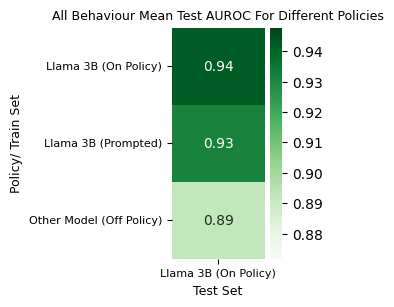

In [53]:
# Plot mean column of all graphs
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data, deception_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

max_val = max([max([c for c in r]) for r in mean_data])
min_val = min([min([c for c in r]) for r in mean_data]) - 0.02
generate_heatmap(mean_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="All Behaviour Mean Test AUROC For Different Policies", column_only=True)

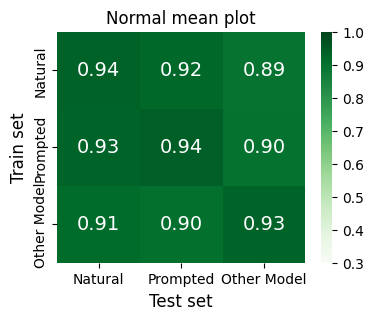

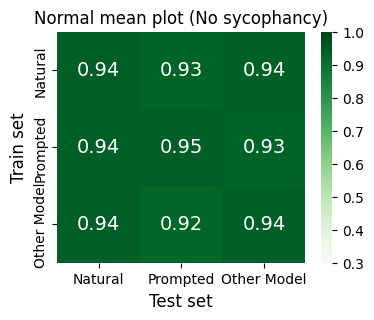

In [10]:
# Plot mean of all graphs
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, title="Normal mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, title="Normal mean plot (No sycophancy)")

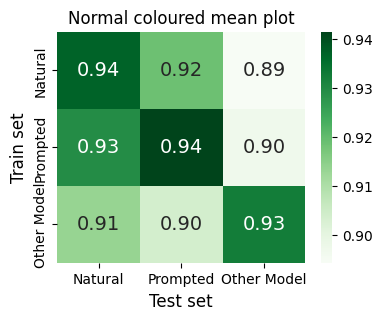

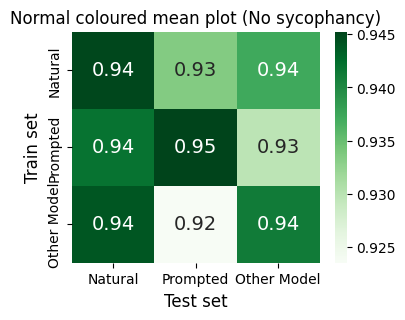

In [23]:
# Plot mean of all coloured graphs
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

max_val = max([max([c for c in r]) for r in mean_data])
min_val = min([min([c for c in r]) for r in mean_data])   
generate_heatmap(mean_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normal coloured mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)
        
max_val = max([max([c for c in r]) for r in mean_data])
min_val = min([min([c for c in r]) for r in mean_data])   
generate_heatmap(mean_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normal coloured mean plot (No sycophancy)")

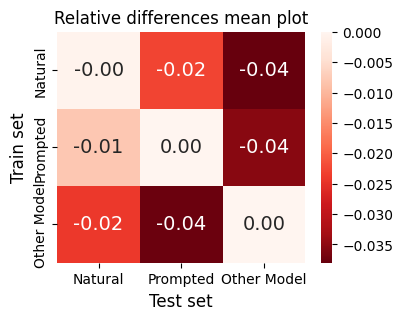

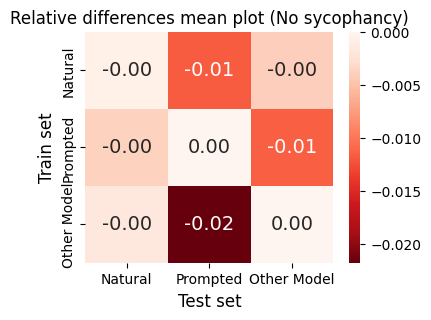

In [11]:
# Plot mean of all graphs with relative differences
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
new_data_list = []
for plot_data in data_list:
    adjusted_plot_data = deepcopy(plot_data)
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            adjusted_plot_data[row][col] = plot_data[row][col] - col_max
    new_data_list.append(adjusted_plot_data)

mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in new_data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, g_args={"cmap": "Reds_r", "vmin": None, "vmax": None}, title="Relative differences mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
new_data_list = []
for plot_data in data_list:
    adjusted_plot_data = deepcopy(plot_data)
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            adjusted_plot_data[row][col] = plot_data[row][col] - col_max
    new_data_list.append(adjusted_plot_data)

mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in new_data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, g_args={"cmap": "Reds_r", "vmin": None, "vmax": None}, title="Relative differences mean plot (No sycophancy)")

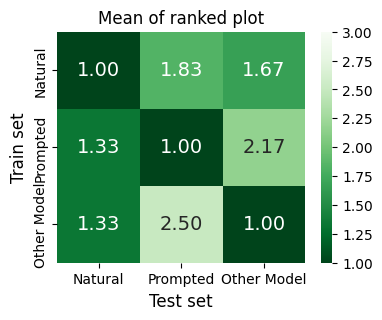

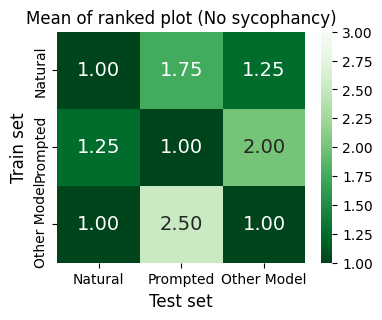

In [25]:
# Plot mean of all graphs with graph ranks
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
new_data_list = []
for plot_data in data_list:
    adjusted_plot_data = rank_columns(plot_data, sf=2)
    new_data_list.append(adjusted_plot_data)

mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in new_data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, g_args={"cmap": "Greens_r", "vmin": 1, "vmax": 3}, title="Mean of ranked plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
new_data_list = []
for plot_data in data_list:
    adjusted_plot_data = rank_columns(plot_data, sf=2)
    new_data_list.append(adjusted_plot_data)

mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in new_data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, g_args={"cmap": "Greens_r", "vmin": 1, "vmax": 3}, title="Mean of ranked plot (No sycophancy)")

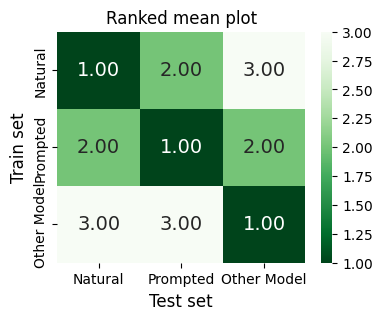

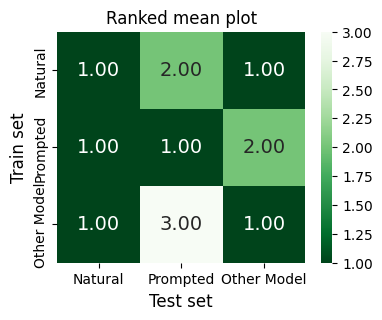

In [26]:
# Plot ranks of mean of all graphs
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

mean_data = rank_columns(mean_data, sf=2)
generate_heatmap(mean_data, g_args={"cmap": "Greens_r", "vmin": 1, "vmax": 3}, title="Ranked mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            mean_data[row][col] += plot_data[row][col]
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

mean_data = rank_columns(mean_data, sf=2)
generate_heatmap(mean_data, g_args={"cmap": "Greens_r", "vmin": 1, "vmax": 3}, title="Ranked mean plot")


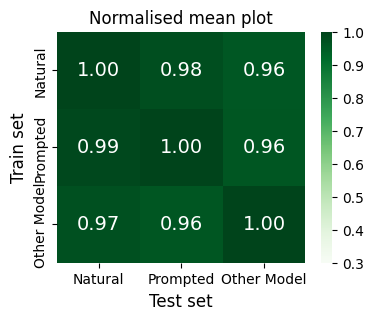

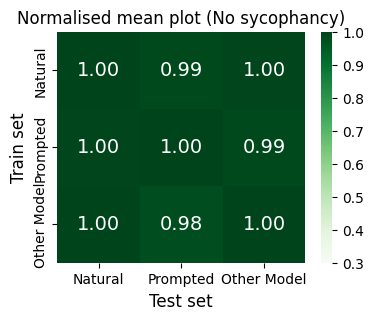

In [10]:
# Plot mean of all graphs normalised
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            mean_data[row][col] += plot_data[row][col] / col_max
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, title="Normalised mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            mean_data[row][col] += plot_data[row][col] / col_max
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

generate_heatmap(mean_data, title="Normalised mean plot (No sycophancy)")

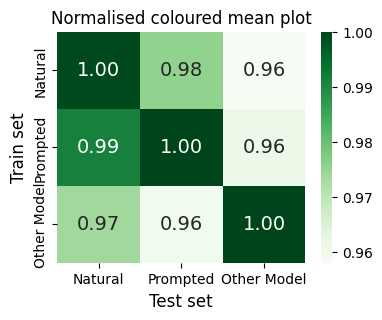

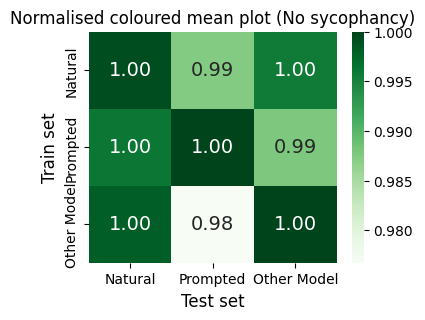

In [13]:
# Plot mean of all graphs normalised coloured
data_list = [refusal_data, lists_data, metaphors_data, science_data, syco_1_data, syco_2_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            mean_data[row][col] += plot_data[row][col] / col_max
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

max_val = max([max([c for c in r]) for r in mean_data])
min_val = min([min([c for c in r]) for r in mean_data])
generate_heatmap(mean_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normalised coloured mean plot")

data_list = [refusal_data, lists_data, metaphors_data, science_data]
mean_data = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for plot_data in data_list:
    for row in range(3):
        for col in range(3):
            col_max = max([r[col] for r in plot_data])
            mean_data[row][col] += plot_data[row][col] / col_max
for row in range(3):
    for col in range(3):
        mean_data[row][col] /= len(data_list)

min_val = min([min([c for c in r]) for r in mean_data])
max_val = max([max([c for c in r]) for r in mean_data])
generate_heatmap(mean_data, g_args={"cmap": "Greens", "vmin": min_val, "vmax": max_val}, title="Normalised coloured mean plot (No sycophancy)")

# Fake Summary Plots

In [1]:
import textwrap
import matplotlib.pyplot as plt
import numpy as np

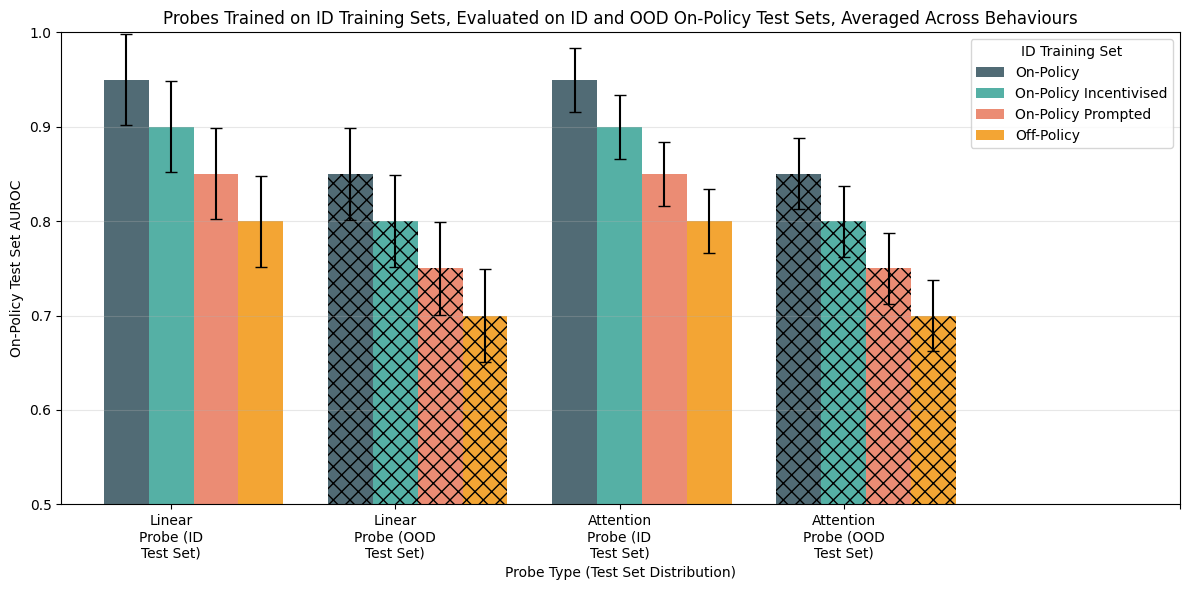

In [27]:
# ID vs OOD means, On-Policy
behaviours = ['Linear Probe (ID Test Set)', 'Linear Probe (OOD Test Set)', 'Attention Probe (ID Test Set)', 'Attention Probe (OOD Test Set)']
results_table = np.full((4, len(behaviours)), 0, dtype=float)

# Fill in fake values
for i in range(len(behaviours)):
    if i == 0 or i == 2:  # ID
        results_table[0, i] = 0.95
        results_table[1, i] = 0.9
        results_table[2, i] = 0.85
        results_table[3, i] = 0.8
    else:  # OOD
        results_table[0, i] = 0.85
        results_table[1, i] = 0.8
        results_table[2, i] = 0.75
        results_table[3, i] = 0.7

masked_array = np.ma.masked_equal(results_table, 0)
row_means = np.ma.mean(masked_array, axis=1)
row_stds = np.ma.std(masked_array, axis=1)

# Extract rows
on_values = results_table[0]
incentivised_values = results_table[1]
prompted_values = results_table[2]
off_values = results_table[3]

# Fake error bars (make them look real-ish)
fake_error = 0.03 + 0.02 * np.random.rand(*on_values.shape)

# Set up positions
gap_size = 0.5
x_first = np.arange(len(behaviours))
x_last = np.array([len(behaviours) + gap_size])
x = np.concatenate([x_first, x_last])
width = 0.2

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#264653', '#2A9D8F', '#E76F51', '#F18F01']

bars1_first = ax.bar(
    x_first - width, on_values, width,
    yerr=fake_error, label='On-Policy',
    color=colors[0], alpha=0.8, capsize=4
)
bars2_first = ax.bar(
    x_first, incentivised_values, width,
    yerr=fake_error, label='On-Policy Incentivised',
    color=colors[1], alpha=0.8, capsize=4
)
bars3_first = ax.bar(
    x_first + width, prompted_values, width,
    yerr=fake_error, label='On-Policy Prompted',
    color=colors[2], alpha=0.8, capsize=4
)
bars4_first = ax.bar(
    x_first + 2 * width, off_values, width,
    yerr=fake_error, label='Off-Policy',
    color=colors[3], alpha=0.8, capsize=4
)

# --- Add hatching for OOD bars only ---
ood_indices = [1, 3]  # "Linear (OOD)" and "Attention (OOD)"
for idx in ood_indices:
    bars1_first[idx].set_hatch('xx')
    bars2_first[idx].set_hatch('xx')
    bars3_first[idx].set_hatch('xx')
    bars4_first[idx].set_hatch('xx')

# Labels, ticks, legend
ax.set_xlabel('Probe Type (Test Set Distribution)')
ax.set_ylabel('On-Policy Test Set AUROC')
ax.set_title('Probes Trained on ID Training Sets, Evaluated on ID and OOD On-Policy Test Sets, Averaged Across Behaviours')

wrapped_labels = ['\n'.join(textwrap.wrap(label, width=10)) for label in behaviours + ['']]
ax.set_xticks(x)
ax.set_xticklabels(wrapped_labels)
ax.legend(loc='upper right', title="ID Training Set")

plt.ylim(0.5, 1)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Save or show
plt.savefig("../data/figures/adrian_fake_summary/id_vs_ood_onpolicy.pdf", dpi=300)
plt.show()


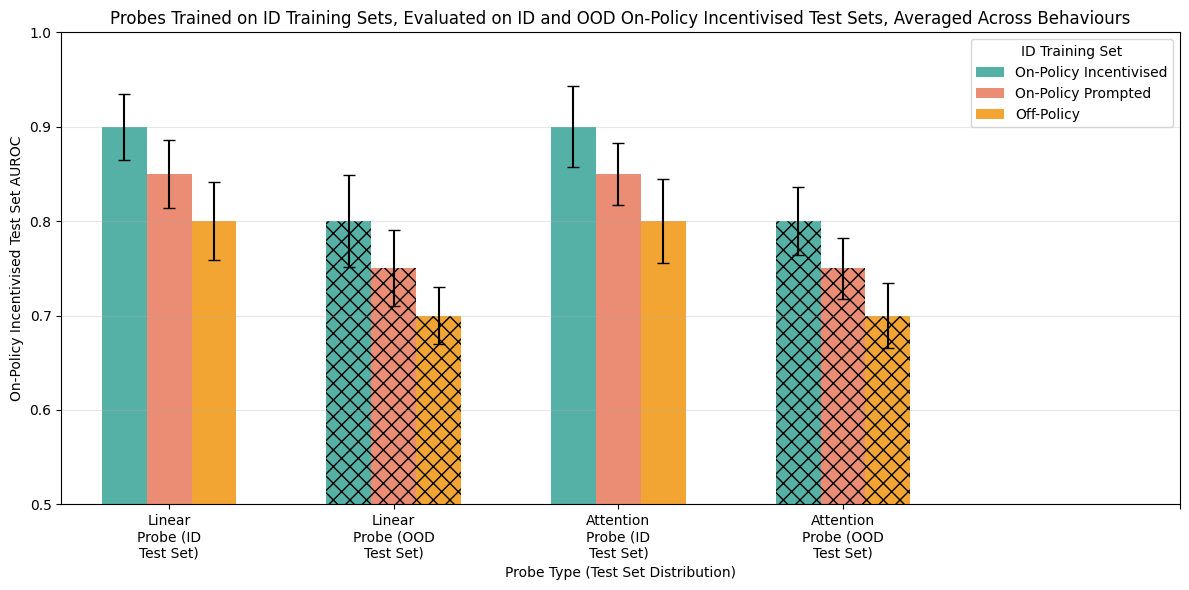

In [39]:
# ID vs OOD means, On-Policy
behaviours = ['Linear Probe (ID Test Set)', 'Linear Probe (OOD Test Set)', 'Attention Probe (ID Test Set)', 'Attention Probe (OOD Test Set)']
results_table = np.full((3, len(behaviours)), 0, dtype=float)

# Fill in fake values
for i in range(len(behaviours)):
    if i == 0 or i == 2:  # ID
        results_table[0, i] = 0.9
        results_table[1, i] = 0.85
        results_table[2, i] = 0.8
    else:  # OOD
        results_table[0, i] = 0.8
        results_table[1, i] = 0.75
        results_table[2, i] = 0.7

masked_array = np.ma.masked_equal(results_table, 0)
row_means = np.ma.mean(masked_array, axis=1)
row_stds = np.ma.std(masked_array, axis=1)

# Extract rows
incentivised_values = results_table[0]
prompted_values = results_table[1]
off_values = results_table[2]

# Fake error bars (correct shape: length 4 each)
fake_error1 = 0.03 + 0.02 * np.random.rand(len(incentivised_values))
fake_error2 = 0.03 + 0.02 * np.random.rand(len(prompted_values))
fake_error3 = 0.03 + 0.02 * np.random.rand(len(off_values))

# Set up positions
gap_size = 0.5
x_first = np.arange(len(behaviours))
x_last = np.array([len(behaviours) + gap_size])
x = np.concatenate([x_first, x_last])
width = 0.2

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#264653', '#2A9D8F', '#E76F51', '#F18F01']

bars1_first = ax.bar(
    x_first - width, incentivised_values, width,
    yerr=fake_error1, label='On-Policy Incentivised',
    color=colors[1], alpha=0.8, capsize=4
)
bars2_first = ax.bar(
    x_first, prompted_values, width,
    yerr=fake_error2, label='On-Policy Prompted',
    color=colors[2], alpha=0.8, capsize=4
)
bars3_first = ax.bar(
    x_first + width, off_values, width,
    yerr=fake_error3, label='Off-Policy',
    color=colors[3], alpha=0.8, capsize=4
)

# --- Add hatching for OOD bars only ---
ood_indices = [1, 3]  # "Linear (OOD)" and "Attention (OOD)"
for idx in ood_indices:
    bars1_first[idx].set_hatch('xx')
    bars2_first[idx].set_hatch('xx')
    bars3_first[idx].set_hatch('xx')

# Labels, ticks, legend
ax.set_xlabel('Probe Type (Test Set Distribution)')
ax.set_ylabel('On-Policy Incentivised Test Set AUROC')
ax.set_title(
    'Probes Trained on ID Training Sets, Evaluated on ID and OOD '
    'On-Policy Incentivised Test Sets, Averaged Across Behaviours'
)

wrapped_labels = ['\n'.join(textwrap.wrap(label, width=10)) for label in behaviours + ['']]
ax.set_xticks(x)
ax.set_xticklabels(wrapped_labels)
ax.legend(loc='upper right', title="ID Training Set")

plt.ylim(0.5, 1)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Save or show
plt.savefig("../data/figures/adrian_fake_summary/id_vs_ood_incentivised.pdf", dpi=300)
plt.show()


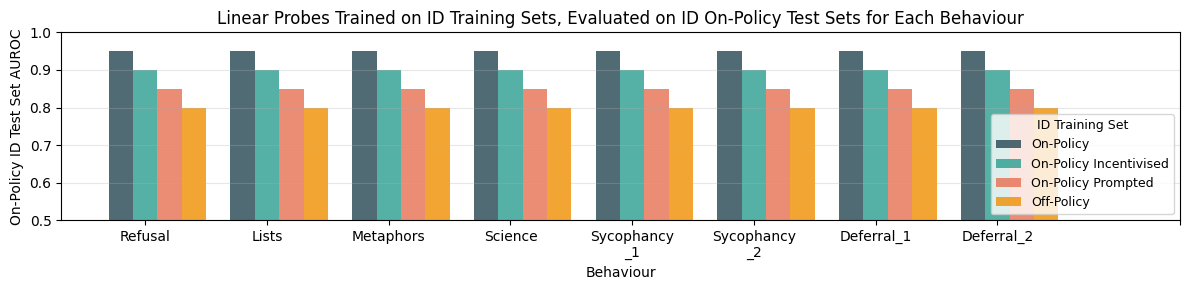

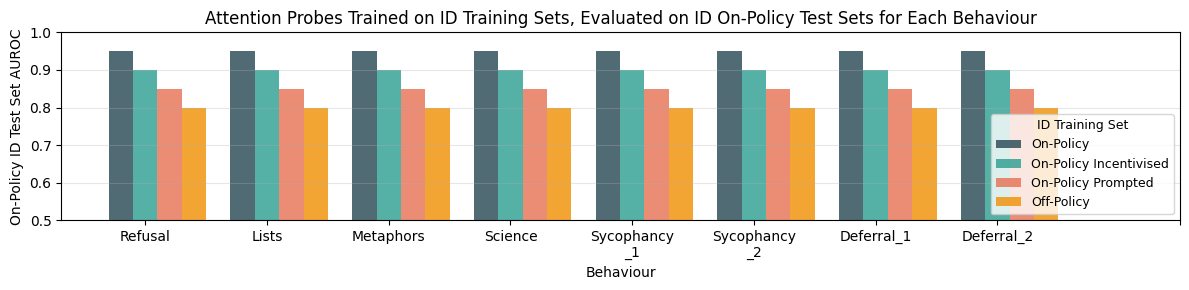

In [33]:
# ID, On-Policy
for probe in ["Linear", "Attention"]:
    # Get all results by querying wandb for all run configs
    behaviours = ['Refusal', 'Lists', 'Metaphors', 'Science', 'Sycophancy_1', 'Sycophancy_2', 'Deferral_1', 'Deferral_2']
    # behaviours += ['Deception_1', 'Deception_2', 'Sandbagging_1', 'Sandbagging_2']
    results_table = np.full((4, len(behaviours)), 0, dtype=float)
    for i in range(len(behaviours)):
        results_table[0, i] = 0.95
        results_table[1, i] = 0.9
        results_table[2, i] = 0.85
        results_table[3, i] = 0.8

    masked_array = np.ma.masked_equal(results_table, 0)
    row_means = np.ma.mean(masked_array, axis=1)
    row_stds = np.ma.std(masked_array, axis=1)

    # Extract the three rows
    on_values = results_table[0]
    incentivised_values = results_table[1] 
    prompted_values = results_table[2] 
    off_values = results_table[3]

    # Set up the bar positions with gap before the last group
    gap_size = 0.5  # Size of the larger gap

    # Create positions: first 9 groups normally spaced, then gap, then last group
    x_first = np.arange(len(behaviours))  # Positions 0, 1, 2, ..., 8
    x_last = np.array([len(behaviours) + gap_size])  # Position 8 + gap
    x = np.concatenate([x_first, x_last])

    width = 0.2      # Width of each bar

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 3))  # Made slightly wider to accommodate gap

    colors = ['#264653', '#2A9D8F', '#E76F51', '#F18F01'] 

    # Create the grouped bars - separate first groups from mean group
    # First groups (without error bars)
    bars1_first = ax.bar(x_first - width, on_values, width, label='On-Policy', color=colors[0], alpha=0.8)
    bars2_first = ax.bar(x_first, incentivised_values, width, label='On-Policy Incentivised', color=colors[1], alpha=0.8)
    bars3_first = ax.bar(x_first + width, prompted_values, width, label='On-Policy Prompted', color=colors[2], alpha=0.8)  
    bars4_first = ax.bar(x_first + 2 * width, off_values, width, label='Off-Policy', color=colors[3], alpha=0.8)

    # # Mean group (with error bars)
    # bars1_mean = ax.bar(x_last - width, row_means[0], width, color=colors[0], alpha=0.8, 
    #                 yerr=row_stds[0], capsize=5, error_kw={'elinewidth': 2, 'capthick': 2})
    # bars2_mean = ax.bar(x_last, row_means[1], width, color=colors[1], alpha=0.8,
    #                 yerr=row_stds[1], capsize=5, error_kw={'elinewidth': 2, 'capthick': 2})
    # bars2_mean = ax.bar(x_last + width, row_means[2], width, color=colors[2], alpha=0.8,
    #                 yerr=row_stds[2], capsize=5, error_kw={'elinewidth': 2, 'capthick': 2})
    # bars3_mean = ax.bar(x_last + 2 * width, row_means[3], width, color=colors[3], alpha=0.8,
    #                 yerr=row_stds[3], capsize=5, error_kw={'elinewidth': 2, 'capthick': 2})

    # Customize the plot
    ax.set_xlabel('Behaviour')
    ax.set_ylabel('On-Policy ID Test Set AUROC')
    ax.set_title(f'{probe} Probes Trained on ID Training Sets, Evaluated on ID On-Policy Test Sets for Each Behaviour')
    ax.set_xticks(x)

    # wrapped_labels = ['\n'.join(textwrap.wrap(label, width=10)) for label in behaviours + ['mean']]
    # ax.set_xticklabels(wrapped_labels)
    wrapped_labels = ['\n'.join(textwrap.wrap(label, width=10)) for label in behaviours + ['']]
    ax.set_xticklabels(wrapped_labels)
    ax.legend(loc='lower right', title="ID Training Set", fontsize=9, title_fontsize=9)
    plt.ylim(0.5, 1)

    # Add a grid for better readability
    ax.grid(True, alpha=0.3, axis='y')

    # Adjust layout and display
    plt.tight_layout()
    plt.savefig(f"../data/figures/adrian_fake_summary/{probe.lower()}_id_onpolicy.pdf", dpi=300)
    plt.show()

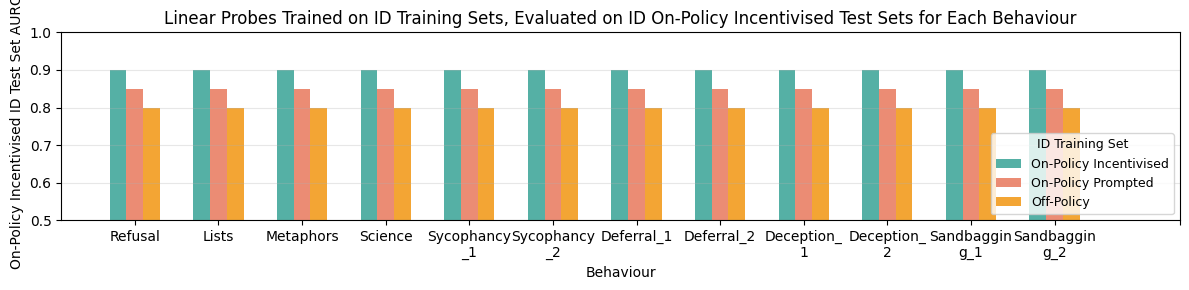

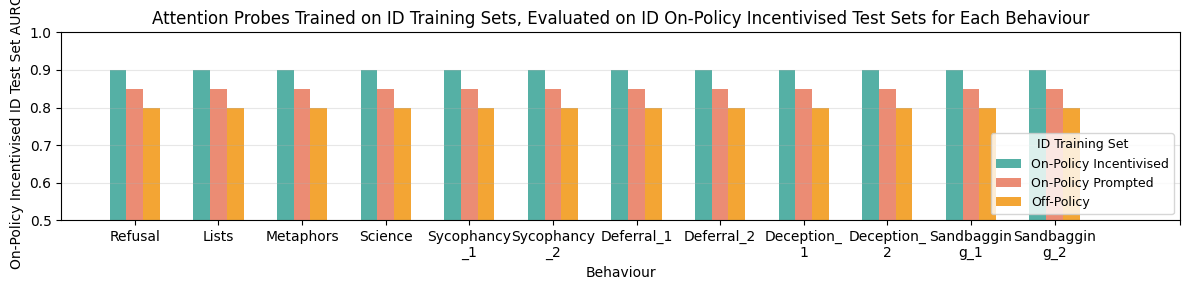

In [34]:
# ID, On-Policy Incentivised

for probe in ["Linear", "Attention"]:
    # Get all results by querying wandb for all run configs
    behaviours = ['Refusal', 'Lists', 'Metaphors', 'Science', 'Sycophancy_1', 'Sycophancy_2', 'Deferral_1', 'Deferral_2']
    behaviours += ['Deception_1', 'Deception_2', 'Sandbagging_1', 'Sandbagging_2']
    results_table = np.full((3, len(behaviours)), 0, dtype=float)
    for i in range(len(behaviours)):
        results_table[0, i] = 0.9
        results_table[1, i] = 0.85
        results_table[2, i] = 0.8

    masked_array = np.ma.masked_equal(results_table, 0)
    row_means = np.ma.mean(masked_array, axis=1)
    row_stds = np.ma.std(masked_array, axis=1)

    # Extract the three rows
    incentivised_values = results_table[0] 
    prompted_values = results_table[1] 
    off_values = results_table[2]

    # Set up the bar positions with gap before the last group
    gap_size = 0.5  # Size of the larger gap

    # Create positions: first 9 groups normally spaced, then gap, then last group
    x_first = np.arange(len(behaviours))  # Positions 0, 1, 2, ..., 8
    x_last = np.array([len(behaviours) + gap_size])  # Position 8 + gap
    x = np.concatenate([x_first, x_last])

    width = 0.2      # Width of each bar

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 3))  # Made slightly wider to accommodate gap

    colors = ['#264653', '#2A9D8F', '#E76F51', '#F18F01'] 

    # Create the grouped bars - separate first groups from mean group
    # First groups (without error bars)
    bars1_first = ax.bar(x_first - width, incentivised_values, width, label='On-Policy Incentivised', color=colors[1], alpha=0.8)
    bars2_first = ax.bar(x_first, prompted_values, width, label='On-Policy Prompted', color=colors[2], alpha=0.8)
    bars3_first = ax.bar(x_first + width, off_values, width, label='Off-Policy', color=colors[3], alpha=0.8)  

    # Customize the plot
    ax.set_xlabel('Behaviour')
    ax.set_ylabel('On-Policy Incentivised ID Test Set AUROC')
    ax.set_title(f'{probe} Probes Trained on ID Training Sets, Evaluated on ID On-Policy Incentivised Test Sets for Each Behaviour')
    ax.set_xticks(x)

    wrapped_labels = ['\n'.join(textwrap.wrap(label, width=10)) for label in behaviours + ['']]
    ax.set_xticklabels(wrapped_labels)
    ax.legend(loc='lower right', title="ID Training Set", fontsize=9, title_fontsize=9)
    plt.ylim(0.5, 1)

    # Add a grid for better readability
    ax.grid(True, alpha=0.3, axis='y')

    # Adjust layout and display
    plt.tight_layout()
    plt.savefig(f"../data/figures/adrian_fake_summary/{probe.lower()}_id_incentive.pdf", dpi=300)
    plt.show()

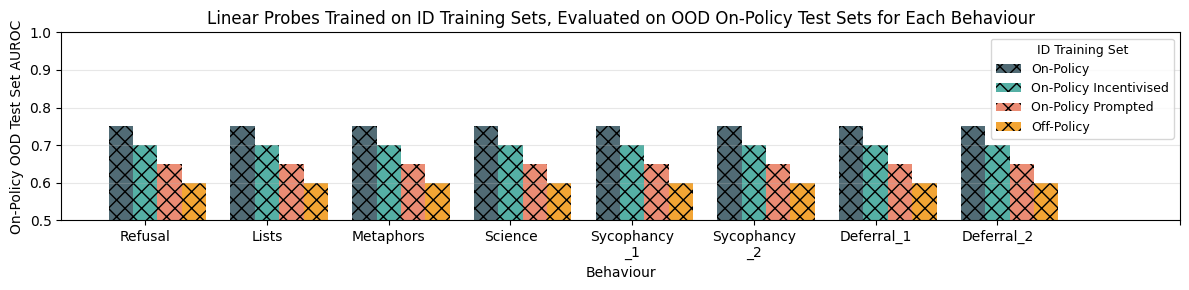

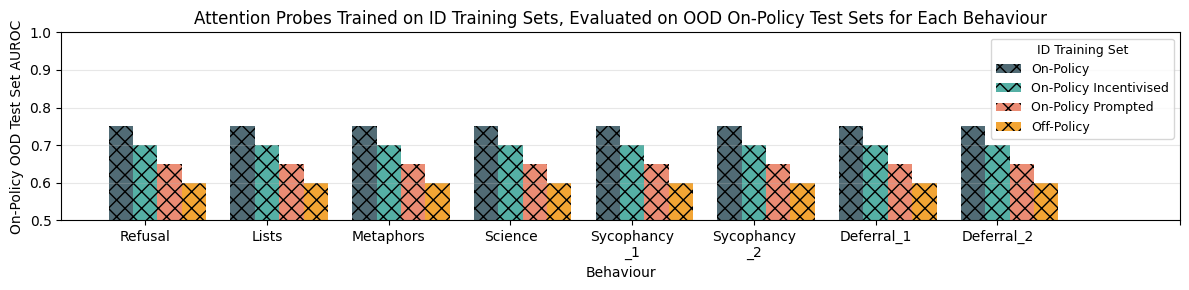

In [35]:
# OOD, On-Policy

for probe in ["Linear", "Attention"]:
    # Get all results by querying wandb for all run configs
    behaviours = ['Refusal', 'Lists', 'Metaphors', 'Science', 'Sycophancy_1', 'Sycophancy_2', 'Deferral_1', 'Deferral_2']
    # behaviours += ['Deception_1', 'Deception_2', 'Sandbagging_1', 'Sandbagging_2']
    results_table = np.full((4, len(behaviours)), 0, dtype=float)
    for i in range(len(behaviours)):
        results_table[0, i] = 0.75
        results_table[1, i] = 0.7
        results_table[2, i] = 0.65
        results_table[3, i] = 0.6

    masked_array = np.ma.masked_equal(results_table, 0)
    row_means = np.ma.mean(masked_array, axis=1)
    row_stds = np.ma.std(masked_array, axis=1)

    # Extract the three rows
    on_values = results_table[0]
    incentivised_values = results_table[1] 
    prompted_values = results_table[2] 
    off_values = results_table[3]

    # Set up the bar positions with gap before the last group
    gap_size = 0.5  # Size of the larger gap

    # Create positions: first 9 groups normally spaced, then gap, then last group
    x_first = np.arange(len(behaviours))  # Positions 0, 1, 2, ..., 8
    x_last = np.array([len(behaviours) + gap_size])  # Position 8 + gap
    x = np.concatenate([x_first, x_last])

    width = 0.2      # Width of each bar

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 3))  # Made slightly wider to accommodate gap

    colors = ['#264653', '#2A9D8F', '#E76F51', '#F18F01'] 

    # Create the grouped bars - separate first groups from mean group
    # First groups (without error bars)
    bars1_first = ax.bar(x_first - width, on_values, width, label='On-Policy', hatch="xx", color=colors[0], alpha=0.8)
    bars2_first = ax.bar(x_first, incentivised_values, width, label='On-Policy Incentivised', hatch="xx", color=colors[1], alpha=0.8)
    bars3_first = ax.bar(x_first + width, prompted_values, width, label='On-Policy Prompted', hatch="xx", color=colors[2], alpha=0.8)  
    bars4_first = ax.bar(x_first + 2 * width, off_values, width, label='Off-Policy', hatch="xx", color=colors[3], alpha=0.8)


    # Customize the plot
    ax.set_xlabel('Behaviour')
    ax.set_ylabel('On-Policy OOD Test Set AUROC')
    ax.set_title(f'{probe} Probes Trained on ID Training Sets, Evaluated on OOD On-Policy Test Sets for Each Behaviour')
    ax.set_xticks(x)

    wrapped_labels = ['\n'.join(textwrap.wrap(label, width=10)) for label in behaviours + ['']]
    ax.set_xticklabels(wrapped_labels)
    ax.legend(loc='upper right', title="ID Training Set", fontsize=9, title_fontsize=9)
    plt.ylim(0.5, 1)

    # Add a grid for better readability
    ax.grid(True, alpha=0.3, axis='y')

    # Adjust layout and display
    plt.tight_layout()
    plt.savefig(f"../data/figures/adrian_fake_summary/{probe.lower()}_ood_onpolicy.pdf", dpi=300)
    plt.show()

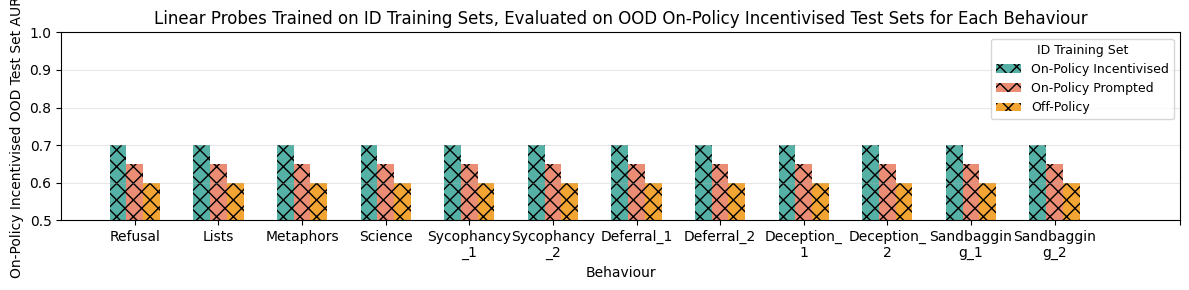

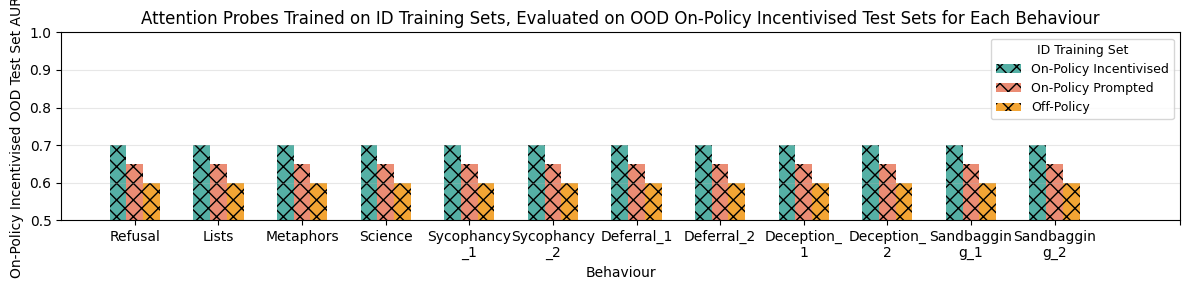

In [36]:
# OOD, On-Policy Incentivised

for probe in ["Linear", "Attention"]:
    # Get all results by querying wandb for all run configs
    behaviours = ['Refusal', 'Lists', 'Metaphors', 'Science', 'Sycophancy_1', 'Sycophancy_2', 'Deferral_1', 'Deferral_2']
    behaviours += ['Deception_1', 'Deception_2', 'Sandbagging_1', 'Sandbagging_2']
    results_table = np.full((3, len(behaviours)), 0, dtype=float)
    for i in range(len(behaviours)):
        results_table[0, i] = 0.7
        results_table[1, i] = 0.65
        results_table[2, i] = 0.6

    masked_array = np.ma.masked_equal(results_table, 0)
    row_means = np.ma.mean(masked_array, axis=1)
    row_stds = np.ma.std(masked_array, axis=1)

    # Extract the three rows
    incentivised_values = results_table[0] 
    prompted_values = results_table[1] 
    off_values = results_table[2]

    # Set up the bar positions with gap before the last group
    gap_size = 0.5  # Size of the larger gap

    # Create positions: first 9 groups normally spaced, then gap, then last group
    x_first = np.arange(len(behaviours))  # Positions 0, 1, 2, ..., 8
    x_last = np.array([len(behaviours) + gap_size])  # Position 8 + gap
    x = np.concatenate([x_first, x_last])

    width = 0.2      # Width of each bar

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 3))  # Made slightly wider to accommodate gap

    colors = ['#264653', '#2A9D8F', '#E76F51', '#F18F01'] 

    # Create the grouped bars - separate first groups from mean group
    # First groups (without error bars)
    bars1_first = ax.bar(x_first - width, incentivised_values, width, label='On-Policy Incentivised', hatch="xx", color=colors[1], alpha=0.8)
    bars2_first = ax.bar(x_first, prompted_values, width, label='On-Policy Prompted', hatch="xx", color=colors[2], alpha=0.8)
    bars3_first = ax.bar(x_first + width, off_values, width, label='Off-Policy', hatch="xx", color=colors[3], alpha=0.8)  

    # Customize the plot
    ax.set_xlabel('Behaviour')
    ax.set_ylabel('On-Policy Incentivised OOD Test Set AUROC')
    ax.set_title(f'{probe} Probes Trained on ID Training Sets, Evaluated on OOD On-Policy Incentivised Test Sets for Each Behaviour')
    ax.set_xticks(x)

    wrapped_labels = ['\n'.join(textwrap.wrap(label, width=10)) for label in behaviours + ['']]
    ax.set_xticklabels(wrapped_labels)
    ax.legend(loc='upper right', title="ID Training Set", fontsize=9, title_fontsize=9)
    plt.ylim(0.5, 1)

    # Add a grid for better readability
    ax.grid(True, alpha=0.3, axis='y')

    # Adjust layout and display
    plt.tight_layout()
    
    plt.savefig(f"../data/figures/adrian_fake_summary/{probe.lower()}_ood_incentive.pdf", dpi=300)
    plt.show()